<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Case_depress%C3%A3o_(NHNES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retrato da Depressão nos EUA: Explorando Perfis e Associações com Hábitos de Saúde (2005-2006)**

Os dados para realização desse case são sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

**O objetivo é responder as seguintes perguntas**:

  - Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

  - Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?


## **Análise inicial nos dados**

Nessa etapa, vamos estabelecer um primeiro contato com os nossos dados. Para começar, vamos responder algumas perguntas:

- Quantos dados temos? (Número de linhas e colunas)

- Quais são as colunas numéricas?

- Temos duplicatas na nossa base de dados? Se sim, vamos removê-las.

- Existem dados nulos nesta base de dados? Será que eles indicam algo importante? O que devemos fazer com eles?

- Vamos observar o dicionário dos dados.

- Qual é a média, mediana, 25º percentil, 75º percentil, mínimo e máximo de cada uma das colunas numéricas?


Antes de tudo, vamos importar as bibliotecas que serão necessárias para realizarmos nossas análises.


In [1]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
from scipy import stats

# Importando o skew
from scipy.stats import skew

Agora vamos importar nossos dados.


In [2]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/DEMO_PHQ.csv')

# Observando os primeiro registros
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


Logo nesse primeiro contato, podemos observar que temos algumas variáveis com valores ausentes. Vamos analisar um pouco mais esses dados e, em seguida, observar o dicionário de dados do mesmo.


In [4]:
# Dimensão do nosso DF
df.shape

(5334, 15)

Temos 5334 linhas e 15 colunas.

Agora vamos observar o dicionário dos dados.


- **Variável: SEQN**
  - **Descrição:** Identificador único do respondente
  - **Valores:**

- **Variável: DPQ010**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Pouco interesse ou pouco prazer em fazer as coisas
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ020**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu para baixo, deprimido(a) ou sem perspectiva
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ030**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ040**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu cansado(a) ou com pouca energia
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ050**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Falta de apetite ou comeu demais
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ060**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ070**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ080**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ090**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: RIAGENDR**
  - **Descrição:** Gênero
  - **Valores:**
    - 1 = Masculino
    - 2 = Feminino

- **Variável: RIDAGEYR**
  - **Descrição:** Idade em anos
  - **Valores:**

- **Variável: RIDRETH1**
  - **Descrição:** Raça/Etnia
  - **Valores:**
    - 1 = Branco não-hispânico
    - 2 = Negro não-hispânico
    - 3 = Mexicano-americano
    - 4 = Outro
    - 5 = Outro - Hispânico

- **Variável: DMDEDUC**
  - **Descrição:** Escolaridade
  - **Valores:**
    - 1 = Menor que 9º ano
    - 2 = 9-12º ano
    - 3 = Ensino médio
    - 4 = Ensino superior incompleto
    - 5 = Superior completo ou maior
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: INDFMINC**
  - **Descrição:** Renda anual familiar (US$)
  - **Valores:**
      - 1 = 0-4999
      - 2 = 5000-9999
      - 3 = 10000-14999
      - 4 = 15000-19999
      - 5 = 20000-24999
      - 6 = 25000-34999
      - 7 = 35000-44999
      - 8 = 45000-54999
      - 9 = 55000-64999
      - 10 = 65000-74999
      - 11 = Maior ou igual a 75000
      - 12 = Maior que 20000
      - 13 = Menor que 20000
      - 77 = Se recusou a responder
      - 99 = Não sabe


Dessa forma, podemos entender melhor o que cada variável tem a nos dizer. Dito isso, vamos entender o tipo dos nossos dados.


In [5]:
# Observando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


Dessa forma, podemos perceber que todas as nossas variáveis das perguntas são qualitativas categóricas. O mesmo se aplica para RIAGENDER, DMDEDUC, RIDRETH1 e INDFMINC, porém a variável INDFMINC é do tipo quantitativa numérica.

A variável SEQN é semelhante a um ID dos nossos dados. Logo, a princípio, por ser um atributo identificador, ele não deve se repetir. Vamos observar se existe algum SEQN repetido na nossa base.


In [6]:
# Observando a soma de valores duplicados
df['SEQN'].duplicated().sum()

0

O resultado foi 0, então podemos assumir que cada um dos nossos identificadores é único.


Agora vamos observar quantos valores ausentes existem em nossa base.


In [7]:
# Observando os valores ausentes
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
soma_ausentes(df)

,Variavéis,Soma de ausentes
1,DPQ010,498
2,DPQ020,498
3,DPQ030,498
4,DPQ040,498
5,DPQ050,498
6,DPQ060,498
7,DPQ070,498
8,DPQ080,498
9,DPQ090,498
14,INDFMINC,47


Como podemos observar, temos o mesmo número de valores ausentes desde as variáveis 'DPQ010' até 'DPQ090', sendo que a soma de valores ausentes é um total de 498 para cada uma dessas perguntas. Enquanto na variável 'indfminc', temos apenas 47 valores ausentes. O restante das nossas variáveis não apresentam nenhum valor ausente.

Agora vamos observar um resumo estatístico dos nossos dados.


In [8]:
# Resumo estatístico dos dados
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


- Observando as perguntas de DPQ010 a DPQ090:
  - Aparentemente, apresentam o mesmo valor mínimo.
  - O primeiro e segundo quartis também são iguais.
  - No terceiro quartil, apenas duas variáveis têm valores diferentes.
  - As médias não diferem muito da mediana, sugerindo uma distribuição próxima da normal, embora um pouco deslocada.
  - A pergunta DPQ040 teve a maior média.
  - Ambas as perguntas apresentam o mesmo valor máximo.
  - A semelhança entre valores mínimos e máximos pode ser devido às perguntas possuírem alternativas iguais, diferindo apenas na pergunta em si.


- A variável Riagender refere-se ao gênero, necessitando de outra análise.

- RIDAGEYR se refere à idade:
  - A pessoa mais nova tem 18 anos e a mais velha, 85.
  - Média de 45 anos e mediana de 43.
  - Setenta e cinco por cento dos dados têm menos de 62 anos.

- RIDRETH1 está relacionado à etnia, com valores de 1 a 5:
  - Necessita de outra análise mais detalhada.

- DMDEDUC relaciona-se ao grau de escolaridade:
  - A média é o ensino médio.
  - 75% das pessoas tem, no máximo, um ensino superior incompleto.

- INDFMINC representa faixas salariais:
  - Sendo que a média salarial gira em torno de 45 a 55 mil dólares.
  - Setenta e cinco por cento têm renda anual de até 75 mil dólares.


**Iniciando análise na segunda base de dados**

Essa nossa análise inicial foi feita com base nos dados sobre alguns sintomas em adultos. Agora vamos realizar uma análise em outra base, só que dessa vez ela será voltada para alimentação e atividades físicas. Essa nossa base se trata de um questionário que avalia a qualidade da dieta dos pacientes, incluindo adultos e crianças. Dito isso, vamos seguir para a importação da mesma.

In [9]:
# Importando o dataset
df2 = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/PAG_HEI.csv')

# Observando os primeiro registros
df2.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Agora que já tivemos uma pequena amostra de como estão os nossos dados, vamos observar a dimensão do nosso DataFrame.

In [10]:
# Dimensão do nosso DF
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

Esse nosso segundo DataFrame possui 9424 linhas e 17 colunas, sendo que a variável 'PAG_MINW' é do tipo quantitativa numérica enquanto a variável 'ADHERENCE' é qualitativa categórica.

Agora vamos observar o dicionário dos dados para entendermos melhor o que cada uma dessas variáveis tem a nos contar.

**SEQN**: Identificador único do respondente

**PAG_MINW**: Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG)

**ADHERENCE**: Grupo de aderência ao Physical Activity Guideline (PAG)
- 1: Baixo (< 150 min/semana)
- 2: Adequado (150-300 min/semana)
- 3: Acima (> 300 min/semana)

**HEI2015C1_TOTALVEG**: Healthy Eating Index - Componente 1 - Total de Vegetais

**HEI2015C2_GREEN_AND_BEAN**: Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas

**HEI2015C3_TOTALFRUIT**: Healthy Eating Index - Componente 3 - Frutas totais

**HEI2015C4_WHOLEFRUIT**: Healthy Eating Index - Componente 4 - Frutas in natura

**HEI2015C5_WHOLEGRAIN**: Healthy Eating Index - Componente 5 - Grãos integrais

**HEI2015C6_TOTALDAIRY**: Healthy Eating Index - Componente 6 - Laticínios

**HEI2015C7_TOTPROT**: Healthy Eating Index - Componente 7 - Proteínas

**HEI2015C8_SEAPLANT_PROT**: Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais

**HEI2015C9_FATTYACID**: Healthy Eating Index - Componente 9 - Ácido-graxo

**HEI2015C10_SODIUM**: Healthy Eating Index - Componente 10 - Sódio

**HEI2015C11_REFINEDGRAIN**: Healthy Eating Index - Componente 11 - Grãos refinados

**HEI2015C12_SFAT**: Healthy Eating Index - Componente 12 - Gordura saturada

**HEI2015C13_ADDSUG**: Healthy Eating Index - Componente 13 - Açúcares adicionados

**HEI2015_TOTAL_SCORE**: Healthy Eating Index - Escore total


É interessante observarmos que cada elemento se refere a algum componente da alimentação e, no final, temos um escore total referente à soma de cada componente que compõe a alimentação de cada registro.

Como vimos no primeiro DataFrame, temos uma coluna que é o nosso atributo chave. Nesse caso, trata-se da coluna SEQN. Vamos observar se existe alguma repetição nessa variável.

In [11]:
# Observando a soma de valores duplicados
df2['SEQN'].duplicated().sum()

0

Novamente, podemos constatar que não temos nenhuma repetição nessa variável.

Agora vamos observar se existem valores ausentes. Logo na primeira vez que importamos e exibimos os primeiros registros, já percebemos a existência dos mesmos. Então, vamos observar quantos são em cada uma das variáveis.

In [12]:
# Observando os valores ausentes
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
soma_ausentes(df2)

,Variavéis,Soma de ausentes
2,ADHERENCE,2274
1,PAG_MINW,2274
8,HEI2015C6_TOTALDAIRY,875
10,HEI2015C8_SEAPLANT_PROT,875
15,HEI2015C13_ADDSUG,875
14,HEI2015C12_SFAT,875
13,HEI2015C11_REFINEDGRAIN,875
12,HEI2015C10_SODIUM,875
11,HEI2015C9_FATTYACID,875
16,HEI2015_TOTAL_SCORE,875


Apenas a variável SEQN não apresenta nenhum valor ausente, o que já era de se esperar levando em consideração que ela é o nosso atributo chave. As variáveis 'ADHERENCE' e 'PAG_MINW' apresentam o maior número de valores ausentes. O restante das variáveis, com exceção da variável 'SEQN', apresentaram o mesmo número de valores ausentes, sendo todos 875.

"Agora que vimos um pouco dos nossos dados ausentes, vamos observar um breve resumo estatístico dos nossos dados.

In [13]:
# Resumo estatístico dos dados
df2.describe()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,9424.000000,7150.000000,7150.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,36311.463285,565.120067,2.074685,2.862097,1.547884,2.659902,2.405864,1.674949,4.054757,4.211867,2.325303,4.205320,4.988956,5.540906,5.781459,5.959600,48.218865
std,2991.517794,908.839544,0.917351,1.472391,2.046650,1.930251,2.152560,1.823515,1.478922,1.157194,2.132526,3.147736,3.293786,3.452289,3.090926,3.215960,11.884725
min,31128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.243513
25%,33720.750000,55.427252,1.000000,1.692308,0.000000,0.725494,0.000000,0.000000,3.336989,3.587339,0.000000,1.544438,2.258630,2.652670,3.514716,3.599885,39.643349
50%,36307.500000,256.351039,2.000000,2.753825,0.000000,2.618554,2.179715,1.018207,5.000000,5.000000,1.836220,3.789177,5.144181,5.880968,5.979335,6.327416,47.589498
75%,38902.250000,696.016166,3.000000,4.165605,3.498013,5.000000,5.000000,2.997076,5.000000,5.000000,5.000000,6.464805,7.705660,8.756728,8.390884,8.859520,56.028859
max,41474.000000,13801.385681,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


**Temos alguns pontos interessantes para observarmos**:

- Ao analisar a variável 'PAG_MINW', que se refere ao tempo total de atividade aeróbica moderada-vigorosa em minutos, podemos observar que a média da nossa base é de 565 minutos, enquanto a mediana é de 256. O valor máximo de 13801 minutos indica a presença de outliers, o que contribui para a diferença significativa entre a média e a mediana. O terceiro quartil está em 696, indicando que 75% dos nossos dados estão abaixo desse valor.

- Na variável 'ADHERENCE', que representa a aderência ao tempo adequado de atividades físicas, a média é de 2, o que é considerado adequado de acordo com nosso dicionário de dados. A mediana está próxima da média, e o terceiro quartil é 3, o que sugere que a distribuição desses dados pode se aproximar de uma normal.

- Na variável 'HEI2015C1_TOTALVEG', que indica o total de vegetais, a média é de 2,8, e a mediana está próxima da média. Os valores variam de 0 a 5, que são os limites das alternativas.

- Na variável 'HEI2015C3_TOTALFRUIT', que representa o total de frutas, a média é de 2,65, e a mediana é de 2,61. Novamente, a média e a mediana estão próximas.

- Entre todas as outras variáveis, temos uma que representa o escore total, 'HEI2015_TOTAL_SCORE', com média de 48 e mediana de 47, indicando uma distribuição semelhante. Observando o terceiro quartil, notamos que 75% dos nossos dados estão abaixo de 56 e 25% acima de 39, sugerindo que a distribuição desses dados pode se aproximar de uma normal.

Como acabamos de observar, temos duas bases de dados que serão necessárias para cumprirmos nossos objetivos. Sendo assim, vamos unificar as mesmas utilizando a variável 'SEQN' como nosso atributo chave. Dito isso, vamos realizar a junção das bases.

In [14]:
# Realizando a junção
df_junto = pd.merge(df, df2, on='SEQN', how='inner')

# Observando os primeiros registros
df_junto.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


Utilizamos o parâmetro 'inner' para que apenas as linhas que tenham os valores chaves em ambas as colunas sejam exibidas. Agora vamos partir para o tratamento dos dados.

Vamos observar as informações gerais dos nossos dados.

In [15]:
# Observando as informações
df_junto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

Dessa forma, podemos notar que nosso df_junto apresenta 5334 linhas e um total de 31 colunas.

## **Tratamento nos dados**

Nessa etapa, temos alguns pontos que precisam de nossa atenção:

- No caso das respostas com valores 7 e 9, pretendo adicionar uma variável com o escore de cada registro para demonstrar o quão severo é o grau de depressão dessa pessoa. No entanto, respostas com valores 7 e 9 podem comprometer bastante esse passo. Portanto, precisamos ajustar o valor do mesmo.

- Tratamento de valores ausentes: Como vamos ficar apenas na analise exploratoria dos dados não iremos realizar nenhum tratamento a respeito desses dados

- Criação de variáveis para soma de escores para cada pessoa na base.


Vamos começar o nosso tratamento organizando as perguntas que têm como resposta 7 ou 9, que são referentes a 7 = “Se recusou a responder” e 9 = “Não sabe”, respectivamente. Por se tratar de uma variável categórica, vamos alterar o seu valor com o intuito de futuramente criarmos uma variável para somar o score total somando as respostas das perguntas de cada pessoa. Dito isso, para pessoas que se recusaram a responder, vamos atribuir um valor de 0.6, e para pessoas que não sabem, será atribuído um valor de 0.3.

Realizando essas substituições, corremos o risco de considerar uma pessoa com altos níveis de depressão mesmo ela não estando. No entanto, caso isso aconteça, é porque a pessoa tem outros indícios desde o começo. Portanto, se ela receber um auxílio mesmo tendo sido classificada 'erroneamente', de qualquer forma o auxílio será importante para ela. Acredito que nesse caso o falso positivo é menos agravante do que um falso negativo.


In [16]:
# Definindo as substituições desejadas
substituicoes = {7: 0.6, 9: 0.3}

# Selecionando as colunas desejadas
colunas_desejadas = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']

# Substituindo os valores nas colunas selecionadas com base nas substituições definidas
df_junto[colunas_desejadas] = df_junto[colunas_desejadas].replace(substituicoes)

# Observando as mudanças em apenas uma variável
df_junto['DPQ010'].value_counts()

DPQ010
0.0    3850
1.0     673
2.0     180
3.0     124
0.3       9
Name: count, dtype: int64

Podemos ver então que as mudanças foram feitas corretamente.



Agora vamos criar uma variável para somar os valores das respostas do questionário DPQ010 até DPQ090. Vamos chamar essa variável de 'phq9'.

In [17]:
# Criando uma nova coluna para armazenar a soma das respostas
df_junto['Phq9'] = df_junto.loc[:, 'DPQ010':'DPQ090'].sum(axis=1)

# Exibindo os primeiros 10 registros nova variável
df_junto['Phq9'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
5    6.0
6    0.0
7    0.0
8    1.0
9    3.0
Name: Phq9, dtype: float64

Dessa forma, temos a soma com base nas respostas dos questionários de cada um dos registros em nossa base.

Agora vamos classificar o grau de gravidade do caso de cada um dos registros com base na soma dos questionários.

In [18]:
# Criando a variável phq_grp com as classificações do escore PHQ-9 usando operações condicionais
df_junto['Phq_grp'] = np.where(df_junto['Phq9'] < 5, 'Sem sintomas', np.where(df_junto['Phq9'] < 10, 'Sintomas leves', 'Sintomas moderados a severos'))

# Observando os valores presentes na coluna
df_junto['Phq_grp'].value_counts()

Phq_grp
Sem sintomas                    4314
Sintomas leves                   715
Sintomas moderados a severos     305
Name: count, dtype: int64

Dessa forma, conseguimos classificar o grau de gravidade de cada um dos nossos registros de acordo com a pontuação feita em nosso questionário. Se a pontuação for menor que 5, então será sem sintomas. Caso seja igual ou maior que cinco, porém menor que 10, então temos sintomas leves. Caso seja maior que 10, então temos sintomas moderados e severos.

## **Análise univariada**

Anteriormente, já realizamos uma rápida análise para nos familiarizarmos melhor com nossos dados. Aqui, vamos realizar uma análise mais individual deles, além de criar uma representação gráfica. Sendo assim, nossos objetivos são:

- Realizar uma análise mais aprofundada das nossas variáveis de interesse.

- Criar uma visualização mais agradável.

Realizando uma rápida configuração para gerar uma visualização completa das colunas no nosso DataFrame.

In [19]:
# Configuração para exxibição de todas as colunas
pd.set_option('display.max_columns', None)

# Exibindo os dados
df_junto.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,Phq9,Phq_grp
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sem sintomas
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem sintomas
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem sintomas
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem sintomas
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem sintomas


Como já realizamos uma análise prévia das perguntas de DPQ010 até DPQ090 e também as utilizamos para realizar o somatório e adicionar o grau de severidade de cada registro de acordo com a soma proveniente das respostas dessas perguntas.

Vamos realizar a exclusão das mesmas visando deixar nosso DataFrame mais enxuto e manter apenas as variáveis que temos interesse. Dito isso, vamos eliminar as variáveis que não utilizaremos.

In [20]:
# Variáveis que serão excluídas do DataFrame
variaveis_para_excluir = [
    'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'
]

# Selecionando todas as colunas exceto aquelas que serão excluídas
df_junto = df_junto.drop(columns=variaveis_para_excluir)

Agora vamos seguir adiante com a nossa análise.

### **INDFMINC**

Vamos começar observando mais de perto a variável 'INDFMINC', que representa a renda anual familiar.

In [21]:
# Resumos estatísticos
df_junto['INDFMINC'].describe()

count    5287.000000
mean        8.738604
std        12.777756
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        99.000000
Name: INDFMINC, dtype: float64

In [22]:
# Observando a moda
df_junto['INDFMINC'].mode()

0    11.0
Name: INDFMINC, dtype: float64

**Pontos importantes**:

- Podemos observar que entre os nossos valores possíveis nessa variável, alguns são bastante altos, como o número 99, que representa 'Não sabe'. Isso pode comprometer a nossa análise.
No entanto, acredito que isso não esteja influenciando tão negativamente assim, pois podemos observar um desvio padrão de 12, indicando que os dados se afastam da média em 12 unidades ao quadrado.

- Levando em consideração que temos valores tão abruptos como o 77 e 99, e que nossos valores iniciam em 1 e vão até 13, podemos considerar que o desvio não está tão alto porém é evidente a existência do mesmo.

- Além disso, podemos observar que a média e a mediana não estão tão afastadas assim.

- Dito isso, vamos tentar observar uns gráficos.

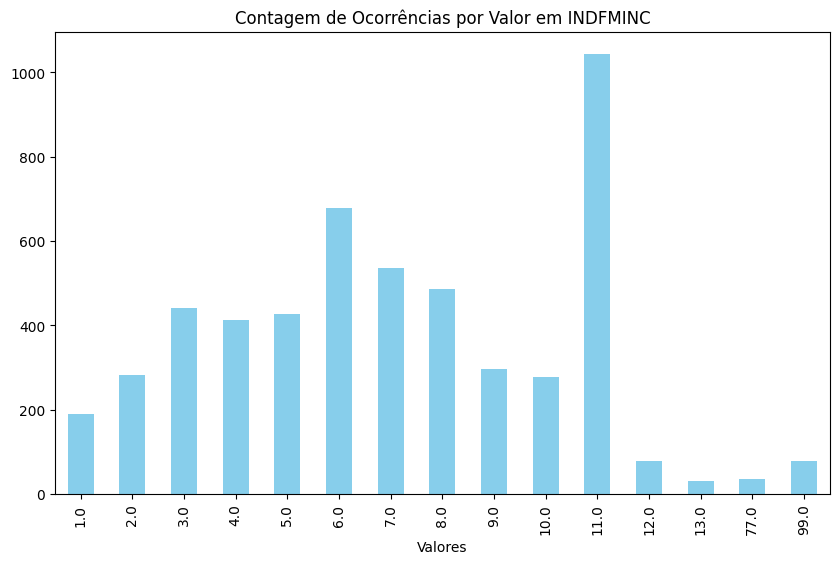

In [23]:
# Calculando as contagens de ocorrências para a coluna 'INDFMINC'
value_counts = df_junto['INDFMINC'].value_counts()

# Ordenando os valores pelas categorias
value_counts_sorted = value_counts.sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
value_counts_sorted.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Contagem de Ocorrências por Valor em INDFMINC')
plt.xlabel('Valores')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

**Conclusões importantes**:

Ao examinarmos os valores possíveis na variável, notamos a presença de valores consideravelmente altos, como 99, indicando incerteza na resposta. Embora isso possa impactar nossa análise, o desvio padrão de 12 sugere uma dispersão moderada em relação à média, apesar da presença de valores extremos como 77 e 99.

Além disso, a proximidade entre a média e a mediana sugere uma distribuição relativamente equilibrada, apesar da presença do desvio. Ao visualizar os dados em gráficos, buscamos compreender melhor essa dinâmica e suas implicações.

Em relação à distribuição de renda familiar, observamos que a categoria mais frequente é aquela que representa famílias com renda superior a 75 mil dólares anuais. Essa predominância é seguida por faixas de renda entre 25 mil e 35 mil, e 35 mil e 45 mil dólares. Com cerca de 50% dos dados concentrados entre 20 mil e 75 mil dólares, nossas conclusões corroboram tanto com a mediana quanto com a média das categorias, oferecendo uma visão abrangente dos padrões de renda na amostra.

### **RIDAGEYR**

Vamos verificar um pouco mais a fundo a idade das pessoas em nossa base.

In [24]:
# Resumo estatístico
df_junto['RIDAGEYR'].describe()

count    5334.000000
mean       45.089989
std        20.145853
min        18.000000
25%        27.000000
50%        43.000000
75%        62.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

In [25]:
# Observando a moda
df_junto['RIDAGEYR'].mode()

0    18
Name: RIDAGEYR, dtype: int64

**Pontos importantes**:

- Como já vimos anteriormente, a pessoa mais jovem em nossa base tem 18 anos e a mais idosa possui 85 anos.

- Inclusive, a idade que mais aparece em nossos registros é 18 anos.

- Temos uma média de idade de 45 anos e uma mediana de 43. A média não está tão distante da mediana, o que indica uma possível simetria nos dados. No entanto, o desvio padrão é de 20, o que pode ser considerado um desvio alto neste caso. Portanto, apesar dos dados parecerem apresentar uma certa simetria, podemos observar que essa simetria talvez não seja tão grande assim.








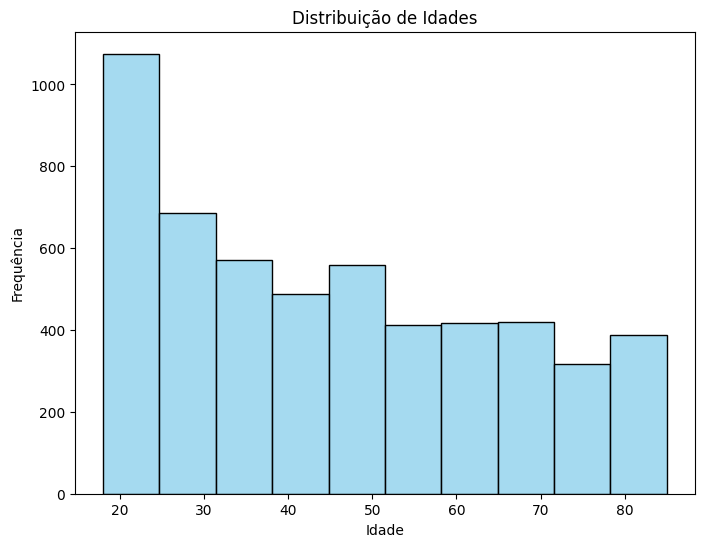

In [26]:
# Criando o histograma para os dados de idade

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o gráfico
sns.histplot(df_junto['RIDAGEYR'], bins = 10, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

**Conclusões importantes**:

A análise revela uma ampla distribuição de idades na amostra, com uma média e mediana em torno dos 45 anos, indicando uma concentração moderada de idade. No entanto, o desvio padrão relativamente alto de 20 sugere uma variação considerável nas idades dos participantes, o que pode indicar uma assimetria à direita na distribuição.

Além disso, os percentis mostram que 50% dos dados estão entre 27 e 62 anos, com a maioria dos participantes sendo adultos mais velhos. Isso ressalta tanto a diversidade de idades na amostra quanto a predominância de adultos.

### **DMDEDUC**

Agora vamos observar dados relacionados ao grau de escolaridade das pessoas em nossa base.

In [27]:
# Resumos estatísticos
df_junto['DMDEDUC'].describe()

count    5334.000000
mean        3.233221
std         1.268395
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: DMDEDUC, dtype: float64

In [28]:
# Observando a moda
df_junto['DMDEDUC'].mode()

0    4
Name: DMDEDUC, dtype: int64

**Pontos importantes**:

- A média e mediana do grau de escolaridade das pessoas em nossa base de dados é o ensino médio. Cerca de 25% das pessoas têm no máximo o 12º ano de escolaridade. Existem pessoas que têm até o 9º ano de escolaridade e muito provavelmente também teremos pessoas que concluíram o ensino superior ou alguma graduação maior.

- Também podemos observar que o registro que mais se repete é o ensino superior incompleto.

- Além disso, 75% das pessoas têm no máximo um ensino superior completo. Isso significa que, mesmo que existam pessoas que finalizaram um ensino superior ou algo maior, elas não passam de 25% dos nossos dados.

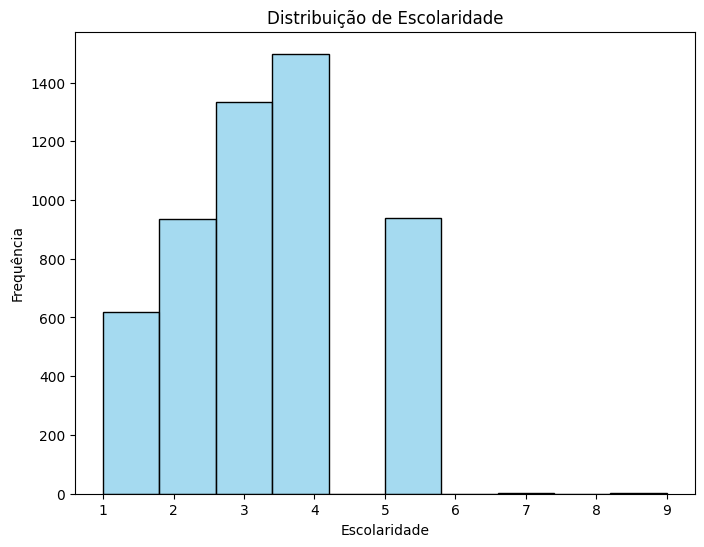

In [29]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o gráfico
sns.histplot(df_junto['DMDEDUC'], bins = 10, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

**Conclusões importantes**:

Com o auxílio do gráfico, confirmamos a predominância do ensino médio e a presença significativa de diversidade educacional na amostra. Embora existam participantes com ensino superior completo ou maior, representando até 25% dos dados, a concentração na categoria de ensino superior incompleto sugere uma tendência de início, mas não conclusão, de estudos de nível superior.

Dessa forma, podemos afirmar que a amostra reflete uma variedade de níveis educacionais, com 50% dos registros situados entre o 12º ano e o ensino superior incompleto. Essa distribuição educacional ampla destaca a importância de considerar a diversidade de experiências educacionais ao analisar a composição da amostra.

### **RIDRETH1**

A variável 'RIDRETH1' refere-se à etnia dos participantes.

In [30]:
# Resumos estatísticos
df_junto['RIDRETH1'].describe()

count    5334.000000
mean        2.871016
std         1.128468
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: RIDRETH1, dtype: float64

In [31]:
# Observando a moda
df_junto['RIDRETH1'].mode()

0    3
Name: RIDRETH1, dtype: int64

**Pontos importantes:**

A média, mediana e moda estão bem próximas entre si. Podemos observar que o valor que aparece com maior frequência é o de número 3, que representa a etnia mexicano-americana.

O nosso terceiro quartil indica que 75% dos nossos dados são do valor 4 para baixo, e o nosso primeiro quartil indica que o valor representante dos 25% dos nossos dados é o número 3. Portanto, podemos concluir que pelo menos 50% dos nossos dados estão entre 3 e 4.

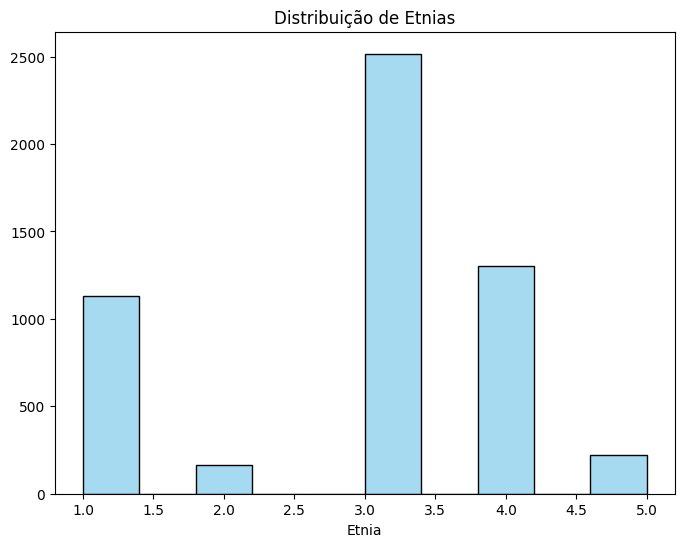

In [32]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o gráfico
sns.histplot(df_junto['RIDRETH1'], bins = 10, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição de Etnias')
plt.xlabel('Etnia')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

**Conclusões importantes:**

Com o auxílio do gráfico, podemos conferir como os dados estão distribuídos e perceber que realmente o valor 3 é o mais comum, seguido pelo número 4, que respectivamente representam mexicano-americano e outros. O top 3 das etnias que apareceram com maior frequência em nossos dados foram o mexicano-americano, outros e branco não hispânico.

A proximidade entre média, mediana e moda sugere uma distribuição homogênea dos dados em torno de um valor central, enquanto o valor mais frequente, representando a etnia mexicano-americana, indica uma predominância dessa etnia na amostra. A distribuição dos dados, conforme indicada pelo terceiro quartil (75% dos dados são do valor 4 para baixo) e pelo primeiro quartil (25% dos dados são do valor 3), sugere uma concentração dos dados em uma faixa estreita entre 3 e 4, o que pode refletir uma uniformidade na composição étnica da amostra.

### **PAG_MINW**

A variável 'PAG_MINW' refere-se ao tempo total semanal de atividade aeróbica moderada a vigorosa em minutos. Sendo assim, vamos analisá-la mais de perto.

In [33]:
# Resumos estatísticos
df_junto['PAG_MINW'].describe()

count     5334.000000
mean       471.765732
std        780.352823
min          0.000000
25%         35.000000
50%        210.000000
75%        568.931871
max      10777.829099
Name: PAG_MINW, dtype: float64

In [34]:
# Observando a moda
df_junto['PAG_MINW'].mode()

0    0.0
Name: PAG_MINW, dtype: float64

**Pontos importantes:**

- Interessante observarmos que, neste caso, a média está bem distante da mediana e temos um desvio padrão bem alto, indicando que os dados tendem a se distanciar um pouco mais da média. Podemos observar que o valor que mais se repete é o número 0.

- Além disso, podemos notar que 25% da nossa base pratica ao menos 35 minutos de atividades físicas, enquanto 50% pratica ao menos 3,5 horas de atividades físicas semanais. Ao observarmos o terceiro quartil, podemos constatar que o maior valor encontrado é de 9,4 horas. Portanto, podemos afirmar que 50% da nossa base faz atividades físicas semanais desde 35 minutos até 9 horas.

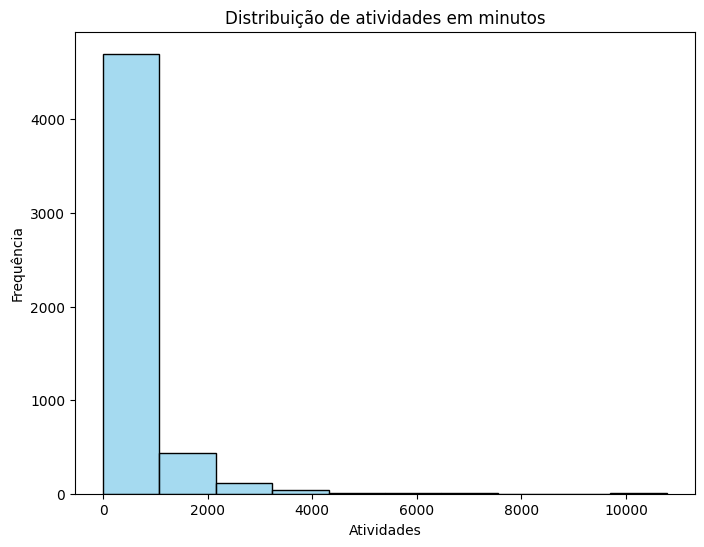

In [35]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o gráfico
sns.histplot(df_junto['PAG_MINW'], bins = 10, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição de atividades em minutos')
plt.xlabel('Atividades')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

**Conclusões importantes:**

Os dados sobre atividade física mostram uma grande variabilidade nos hábitos de exercício, indicada pela diferença entre média e mediana, juntamente com o alto desvio padrão.

O valor mais comum sendo zero sugere que muitos não praticam atividades físicas regularmente, porém uma parte considerável da amostra é ativa, com 25% praticando pelo menos 35 minutos por semana e metade praticando 3,5 horas semanais. Isso sugere uma divisão marcante entre os ativos e os inativos, com uma ampla variação nos hábitos de exercício.

###**ADHERENCE**

Essa variavel se refere a quantidade e os tipos de atividade física necessários para manter uma boa saúde, tendo como categorias:

- 1: Baixo (< 150 min/semana)
- 2: Adequado (150-300 min/semana)
- 3: Acima (> 300 min/semana)

In [36]:
# Resumos estatísticos
df_junto['ADHERENCE'].describe()

count    5334.000000
mean        1.979753
std         0.918364
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: ADHERENCE, dtype: float64

In [37]:
# Resumos estatísticos
df_junto['ADHERENCE'].value_counts()

ADHERENCE
1.0    2304
3.0    2196
2.0     834
Name: count, dtype: int64

In [38]:
# Resumos estatísticos
df_junto['ADHERENCE'].mode()

0    1.0
Name: ADHERENCE, dtype: float64

**Pontos importantes:**

- Há uma distribuição equilibrada entre média e mediana, sugerindo uma tendência central consistente nos dados.

- Um desvio padrão alto indica uma variabilidade significativa nos valores da amostra.

- Observa-se uma tendência de extremos na quantidade de exercícios praticados, com uma parte significativa dos registros apresentando valores muito baixos ou muito altos.

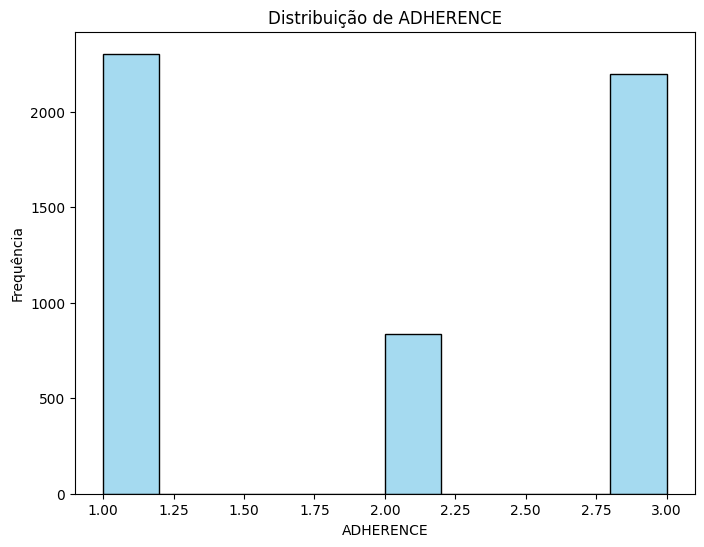

In [39]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o gráfico
sns.histplot(df_junto['ADHERENCE'], bins = 10, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição de ADHERENCE')
plt.xlabel('ADHERENCE')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

**Conclusões importantes:**

Os dados revelam uma distribuição equilibrada entre a média e a mediana do tempo total semanal de atividade aeróbica moderada a vigorosa, embora um desvio padrão alto indique uma variabilidade significativa. Enquanto 25% dos registros indicam uma baixa quantidade de exercícios, metade da amostra mantém uma quantidade adequada.

No entanto, ao considerarmos o terceiro quartil, observamos que até 75% dos dados ultrapassam essa quantidade adequada. A moda sugere uma prevalência de registros com uma quantidade menor de exercícios, com a segunda categoria mais frequente indicando uma quantidade acima do recomendado. Portanto, nossos dados apresentam algumas extremidades, com uma parte significativa da amostra exercitando-se abaixo do ideal e outra parte exercitando-se acima.

### **HEI2015_TOTAL_SCORE**

Essa variável representa o somatório das respostas das pessoas às perguntas sobre alimentos. Em suma, é o total de pontos que cada pessoa acumulou ao marcar como é sua alimentação.

In [40]:
# Resumos estatísticos
df_junto['HEI2015_TOTAL_SCORE'].describe()

count    5060.000000
mean       49.971421
std        12.324533
min        16.059212
25%        41.032289
50%        49.512445
75%        58.168013
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

Podemos observar que a média de pontos é de 49,97, quase atingindo os 50 pontos. Caso uma pessoa marcasse o valor máximo em todas as opções, ela teria 100 pontos. No entanto, é importante destacar que nesse somatório não incluímos apenas componentes saudáveis, como vegetais e frutas. Também estão presentes o sódio e o açúcar, que em grandes quantidades podem ser prejudiciais à saúde. Portanto, é crucial analisar o quanto esses componentes estão influenciando nosso escore total.

Em vez de analisarmos apenas a variável que representa o total de pontos em cada uma das categorias disponíveis, vamos gerar um gráfico com o intuito de entendermos melhor a representação de cada variável em nosso conjunto de dados.








In [41]:
# Realizando alguns ajustes antes de criarmos o gráfico
df_dieta = df2.copy()

# Lista com as partes do nome das colunas a serem removidas
partes_a_remover = ['HEI2015C1_', 'HEI2015C2_', 'HEI2015C3_', 'HEI2015C4_', 'HEI2015C5_',
                    'HEI2015C6_', 'HEI2015C7_', 'HEI2015C8_', 'HEI2015C9_', 'HEI2015C10_',
                    'HEI2015C11_', 'HEI2015C12_', 'HEI2015C13_', 'HEI2015C14_', 'HEI2015_']

# Renomear as colunas removendo as partes do nome
for i in partes_a_remover:
    df_dieta.columns = df_dieta.columns.str.replace(i, '')

Agora que renomeamos as colunas, podemos gerar uma visualização menos poluída. Vamos ver como ficou. Lembrando que esses ajustes foram feitos apenas para proporcionar uma visualização mais clara do gráfico.

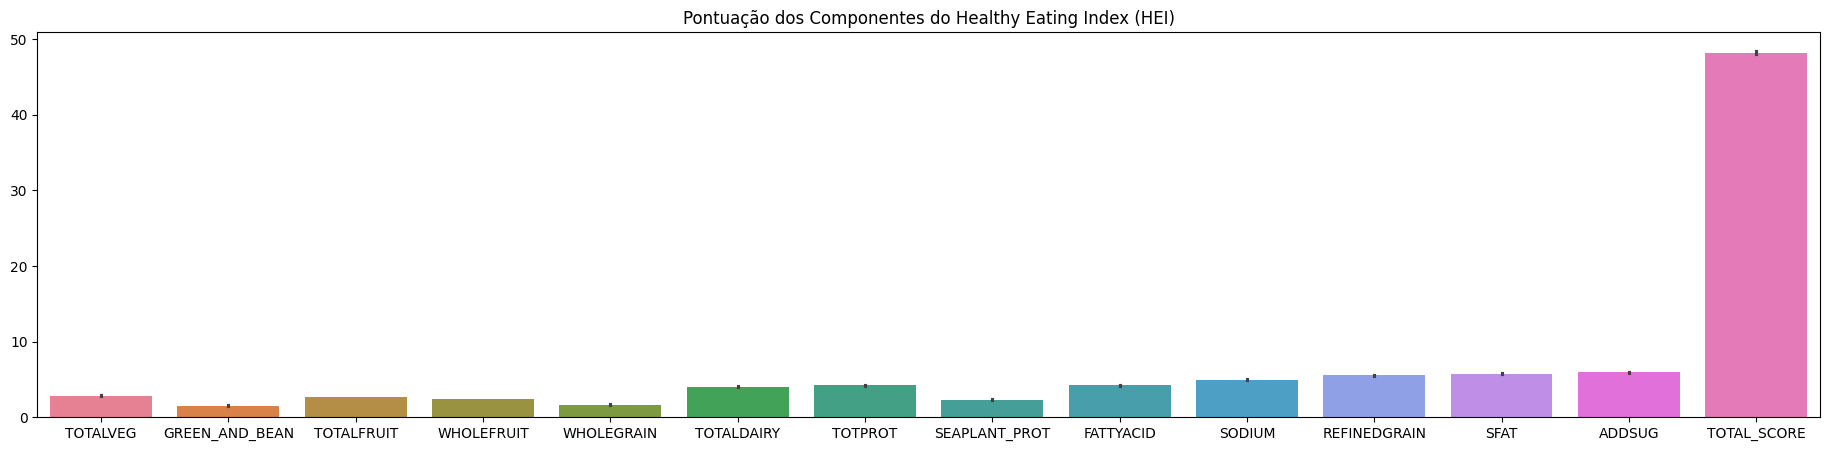

In [42]:
# Definindo o tamanho da figura
plt.figure(figsize=(23, 5))

# Selecionando apenas as colunas desejadas
colunas_desejadas = ['TOTALVEG', 'GREEN_AND_BEAN', 'TOTALFRUIT', 'WHOLEFRUIT', 'WHOLEGRAIN', 'TOTALDAIRY', 'TOTPROT', 'SEAPLANT_PROT', 'FATTYACID', 'SODIUM', 'REFINEDGRAIN', 'SFAT', 'ADDSUG', 'TOTAL_SCORE']

# Criando um novo DataFrame contendo apenas as colunas desejadas
df_selecionado = df_dieta[colunas_desejadas]

# Criando o barplot com as colunas desejadas
sns.barplot(data=df_selecionado)

# Definindo o título
plt.title('Pontuação dos Componentes do Healthy Eating Index (HEI)')

# Deixando as labels vazias
plt.xlabel('')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Utilizando o gráfico dessa forma, podemos ter uma noção de como anda a dieta das pessoas em nosso DF. Dito isso, vamos observar alguns **pontos importantes**:

- Vamos começar observando da esquerda para a direita, onde temos o total de vegetais e a quantidade de verduras verdes escuras e leguminosas ('TOTALVEG' e 'GREEN_AND_BEAN'). É evidente que nossos dados apresentam um consumo de vegetais mais aparente do que de verduras verdes escuras e leguminosas.

- Ao observarmos o total de frutas ('TOTALFRUIT'), notamos um valor menor do que o de verduras, e ao analisarmos a fruta in natura ('WHOLEFRUIT'), vemos que o valor é ainda menor do que os totais de outras frutas.

- Quando observamos grãos integrais e laticínios ('WHOLEGRAIN' e 'TOTALDAIRY'), percebemos que a quantidade de grãos integrais é baixa, enquanto a de laticínios é maior do que o total de vegetais.

- A proteína ('TOTPROT') tem uma quantidade bem próxima do laticínios e um bem maior do que todas as outras que vimos até o momento. Já as plantas marinhas e proteínas vegetais ('SEAPLANT_PROT') têm um consumo muito baixo, semelhante aos grãos integrais.

- Observando a quantidade de ácidos graxos ('FATTYACID'), podemos notar que ele aparece em grande quantidade se comparado com as demais que vimos até agora e ele esta bem proximo da quantidade de proteina essas duas categorias apareceram em maiores quantidades até o momento. Logo após, temos a quantidade de sódio ('SODIUM'), que até o momento é o que aparece em maior quantidade em nossos registros.

- Quando voltamos nossa atenção para os grãos refinados ('REFINEDGRAIN'), notamos que, até o momento, é o que aparece em maior quantidade. Aparentemente, o consumo dele é maior do que todos os outros individualmente. Ao olharmos para a variável ('SFAT'), que é a Gordura saturada, vemos que, ela ultrapassa variáveis como grãos refinados e proteínas que até então eram o que apareciam em maiores quantidades.

- As últimas variáveis do gráfico são respectivamente 'ADDSHUG' e 'TOTAL_SCORE'. A primeira é referente aos açúcares adicionados, podemos notar que é uma quantidade bem alta e a aparentemente um pouco maior que a nossa variável de gordura saturada que até então era a mais presente em nossos dados. E a segunda, nada mais é do que a soma de todas as outras variáveis.

**Conclusões importantes**

- Primeiramente, observamos que o consumo de vegetais é mais aparente do que o de verduras verdes escuras e leguminosas, sugerindo uma possível preferência ou hábito alimentar em relação aos vegetais. Além disso, constatamos que o consumo de frutas in natura é menor do que o de outras frutas, indicando uma potencial preferência por frutas processadas ou industrializadas em vez de frutas frescas.

- Outro ponto relevante é a baixa quantidade de grãos integrais em comparação com laticínios, sugerindo uma possível necessidade de aumentar o consumo de grãos integrais para uma dieta mais equilibrada. Também notamos que a quantidade de proteína é significativa, próxima à dos laticínios, o que pode indicar uma preferência por alimentos ricos em proteína na dieta dos participantes.

- Além disso, a presença de ácidos graxos em quantidades expressivas, juntamente com o alto teor de sódio, chama a atenção para a necessidade de monitorar o consumo desses componentes, pois o excesso pode ser prejudicial à saúde. Por fim, o elevado consumo de açúcares adicionados destaca a importância de reduzir a ingestão desses alimentos para promover uma alimentação mais saudável e equilibrada.

**Observando as medidas**

Nesta seção, faremos uma análise estatística resumida dos dados para confirmar ou rejeitar as hipóteses levantadas até o momento.

In [43]:
# Medidas estatísticas
df_selecionado.describe()

,TOTALVEG,GREEN_AND_BEAN,TOTALFRUIT,WHOLEFRUIT,WHOLEGRAIN,TOTALDAIRY,TOTPROT,SEAPLANT_PROT,FATTYACID,SODIUM,REFINEDGRAIN,SFAT,ADDSUG,TOTAL_SCORE
count,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,2.862097,1.547884,2.659902,2.405864,1.674949,4.054757,4.211867,2.325303,4.205320,4.988956,5.540906,5.781459,5.959600,48.218865
std,1.472391,2.046650,1.930251,2.152560,1.823515,1.478922,1.157194,2.132526,3.147736,3.293786,3.452289,3.090926,3.215960,11.884725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.243513
25%,1.692308,0.000000,0.725494,0.000000,0.000000,3.336989,3.587339,0.000000,1.544438,2.258630,2.652670,3.514716,3.599885,39.643349
50%,2.753825,0.000000,2.618554,2.179715,1.018207,5.000000,5.000000,1.836220,3.789177,5.144181,5.880968,5.979335,6.327416,47.589498
75%,4.165605,3.498013,5.000000,5.000000,2.997076,5.000000,5.000000,5.000000,6.464805,7.705660,8.756728,8.390884,8.859520,56.028859
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


**Pontos importantes**

- Aqui podemos confirmar algumas das conclusões que observamos anteriormente. Por exemplo, o consumo de vegetais é maior do que o de verduras verdes, como evidenciado pelas medidas de média maior, desvio padrão menor e valores de todos os quartis superiores. Similarmente, ao compararmos o total de frutas com frutas in natura, notamos que o total de frutas apresenta uma média maior e um desvio menor, indicando uma preferência por outros tipos de frutas em nossa base.

- É evidente a discrepância entre grãos integrais e laticínios, com os laticínios apresentando uma média maior, um desvio menor e todos os quartis superiores. Apesar disso, a quantidade de laticínios é próxima à de proteína, embora esta última seja ligeiramente maior.

- Observamos que a quantidade de ácido graxo é consideravelmente alta, comparável até mesmo com as quantidades de proteínas e laticínios. Além disso, o sódio também apresenta medidas significativas, equiparando-se a outras variáveis como proteínas, laticínios e ácido graxo.

- Embora a gordura saturada e os grãos refinados apresentem medidas semelhantes, a gordura saturada aparece em maior quantidade. O açúcar é o elemento que aparece em maior quantidade, embora gordura saturada e grãos refinados cheguem bem perto dele.

### **Phq9 e Phq_grp**

Essa variável se refere ao total de pontos que cada pessoa fez ao responder as perguntas dos questionários de DPQ010 até DPQ090. No entanto, essa variável por si só não nos oferece muita informação em comparação com a variável que criamos a partir dela, a Phq_grp. Dito isso, vamos observar esta última.

In [44]:
# Observando a quantidade de vezes que cada categoria aparece
df_junto['Phq_grp'].value_counts()

Phq_grp
Sem sintomas                    4314
Sintomas leves                   715
Sintomas moderados a severos     305
Name: count, dtype: int64

Com base nesses dados, observa-se que:

- **Sem sintomas**: Representam aproximadamente 84,9% (4314 casos) do total de registros.

- **Sintomas leves**: Correspondem a cerca de 14,0% (715 casos) do total.

- **Sintomas moderados a severos**: Totalizam aproximadamente 1,1% (305 casos) do conjunto de dados.

Esses números sugerem que a grande maioria dos casos (84,9%) não apresenta sintomas, enquanto uma parcela menor apresenta sintomas leves (14,0%) ou moderados a severos (1,1%).

Essa distribuição ressalta a predominância de casos em que não há sintomas ou estes são leves, em comparação com os casos em que os sintomas são moderados a severos. Embora os casos de sintomas moderados a severos sejam menos frequentes, é importante prestar atenção a eles devido à sua gravidade potencial.

## **Análise bivariada**

Nessa etapa, vamos analisar as interações entre as variáveis e se, ao realizarmos algumas combinações, conseguimos retirar alguma informação interessante. É aqui que iremos tentar responder às nossas perguntas iniciais, sendo elas:

- Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos?

- Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

### **Testes de hipóteses (atividades físicas)**

Vamos observar a relação entre as atividades físicas e os sintomas de depressão.

In [48]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["PAG_MINW"].mean().sort_values(ascending=False)

Phq_grp
Sem sintomas                    486.124971
Sintomas leves                  462.722282
Sintomas moderados a severos    289.865104
Name: PAG_MINW, dtype: float64

Lembrando que nossa variável 'PAG_MINW' está relacionada ao tempo em minutos gastos em atividades físicas durante a semana. Observando esses dados, podemos assumir que pessoas com uma média de atividades físicas maior tendem a apresentar menos sintomas de depressão.

**Vamos observar graficamente como a média de atividades físicas semanais varia de acordo com os níveis de sintomas.**

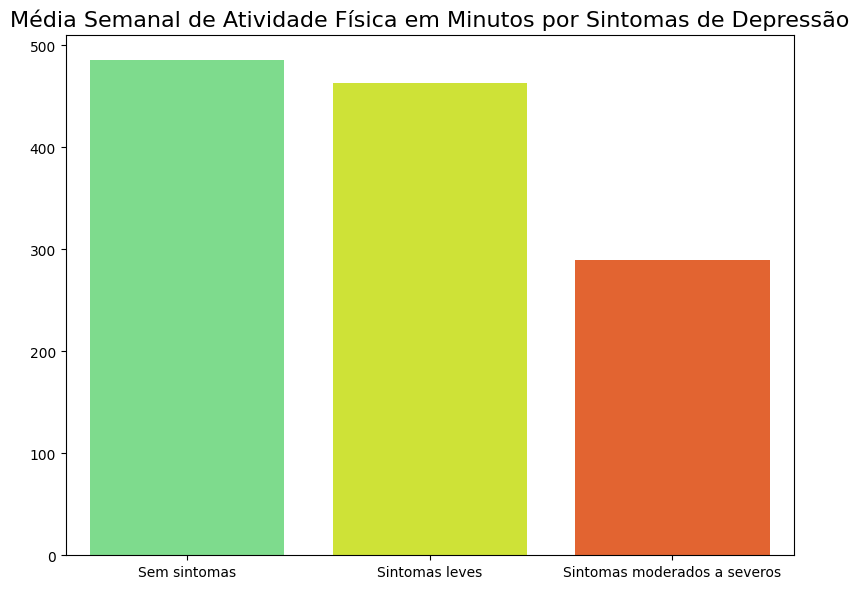

In [49]:
# Definindo as cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Armazenando o agrupamento na variável e
df_junto_pagminw = df_junto.groupby("Phq_grp")["PAG_MINW"].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_junto_pagminw.index, y=df_junto_pagminw.values,  hue=df_junto_pagminw.index, palette=cores, legend=False)

# Adicionando título e rótulos
ax.set_title("Média Semanal de Atividade Física em Minutos por Sintomas de Depressão", fontsize=16)
ax.set_xlabel('')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Agora vamos observar a variável 'ADHERENCE'.

In [50]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["ADHERENCE"].mean().sort_values(ascending=False)

Phq_grp
Sem sintomas                    2.012286
Sintomas leves                  1.916084
Sintomas moderados a severos    1.668852
Name: ADHERENCE, dtype: float64

Aqui podemos observar que, em média, pessoas que realizam mais atividades físicas tendem a possuir um grau de depressão cada vez menor se comparado com pessoas que praticam menos atividades físicas. Claro que precisamos de um teste de hipóteses para termos um pouco mais de certeza do que estamos observando.

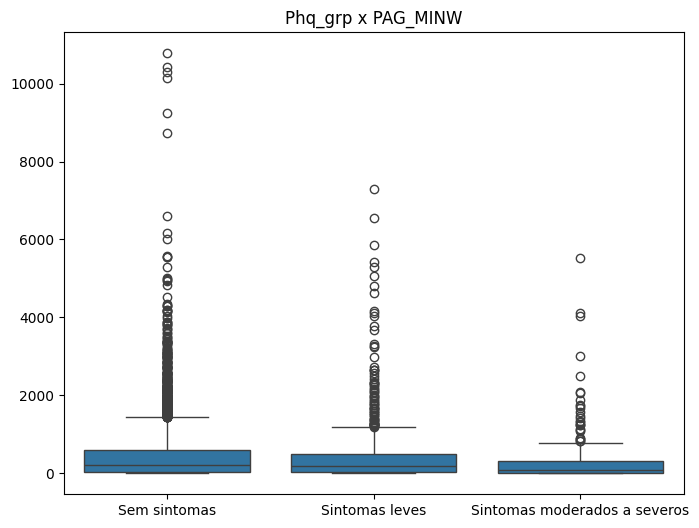

In [51]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x = 'Phq_grp', y = 'PAG_MINW', data = df_junto)

# Definindo título e labels
plt.title('Phq_grp x PAG_MINW')
plt.xlabel('')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Nesse caso, podemos observar que a mediana das pessoas sem sintomas e das com sintomas leves estão bem próximas, já os sintomas moderados a severos estão um pouco mais distantes, embora também estejam bem próximos dos outros. Nesse caso, fica evidente a sobreposição entre os boxplots, reforçando a necessidade de aplicarmos um **teste de hipóteses** para observarmos se a diferença entre os grupos realmente é significante.

Antes de mais nada, vamos checar se existe diferença entre as médias das pessoas que apresentam algum sintoma e praticam exercícios e as pessoas que não apresentam sintomas e também praticam exercícios. Para isso, vamos dividir nossos registros entre pessoas que apresentam sintomas e pessoas que não apresentam.

In [52]:
#DataFrame com pessoas que têm sintomas
df_com_sintomas = df_junto[df_junto['Phq9'] > 5][['Phq9', 'PAG_MINW']]

# DataFrame com pessoas que não têm sintomas
df_sem_sintomas = df_junto[df_junto['Phq9'] < 5][['Phq9', 'PAG_MINW']]

Agora que realizamos as divisões com as mesmas condições que fizemos anteriormente, vamos verificar a média de cada um desses grupos.

In [53]:
# Média de atividades das pessoas sem sintomas
media_atividades_sem = df_sem_sintomas['PAG_MINW'].mean()

# Média de atividades das pessoas com sintomas
media_atividades_com = df_com_sintomas['PAG_MINW'].mean()

print(f"A média de atividades das pessoas sem sintomas é de: {media_atividades_sem}\nA média de atividades das pessoas com sintomas é de: {media_atividades_com}")

A média de atividades das pessoas sem sintomas é de: 486.12497149299617
A média de atividades das pessoas com sintomas é de: 399.07021590513637


Aqui podemos observar que pessoas sem sintomas apresentam uma média de atividades físicas maior do que aquelas que têm algum sintoma.

Este é um claro exemplo de um teste bicaudal, onde nossas hipóteses são:

- H0: média de atividades físicas com pessoas que apresentam sintomas = média de atividades físicas com pessoas que não apresentam sintomas

- Ha: média de atividades físicas com pessoas que apresentam sintomas ≠ média de atividades físicas com pessoas que não apresentam sintomas

Dito isso, vamos prosseguir com a aplicação do teste.

In [54]:
# Realizando o teste t
_, p_valor = stats.ttest_ind(df_com_sintomas, df_sem_sintomas)

# Pegando o primeiro p-valor
p_valor = p_valor[1]

# Nível de significância
alpha = 0.05

# Conclusões
if p_valor < alpha:
    print("Rejeitar H0: Há evidências de que existe diferença na média de atividades fisicas entre pessoas com sintomas de depressão e pessoas sem os sintomas.")
else:
    print("Falha em rejeitar H0: Não há evidências suficientes para afirmar que há diferença na média de atividades fisicas entre pessoas com sintomas de depressão e pessoas sem os sintomas.")

# Exibindo o p-valor
print(p_valor)

Rejeitar H0: Há evidências de que existe diferença na média de atividades fisicas entre pessoas com sintomas de depressão e pessoas sem os sintomas.
0.003819257906225103


Segundo nosso teste de hipóteses e um nível de significância de 0,05, rejeitamos a hipótese nula. Logo, podemos afirmar que as médias são diferentes.

Vamos observar novamente a média de atividades físicas das pessoas com e sem sintomas.

In [55]:
print(f"A média de atividades das pessoas sem sintomas é de: {media_atividades_sem}\nA média de atividades das pessoas com sintomas é de: {media_atividades_com}")

A média de atividades das pessoas sem sintomas é de: 486.12497149299617
A média de atividades das pessoas com sintomas é de: 399.07021590513637


Realmente existe uma diferença de 87 minutos no tempo total de atividades físicas semanais entre as pessoas com e sem sintomas.

Lembrando que aqui estamos observando apenas dois grupos de pessoas, sendo um grupo de pessoas que não têm sintomas e, no outro, pessoas que têm sintomas. Quando começarmos a observar diferentes graus de sintomas, talvez notemos uma diferença maior entre o tempo de atividades.

Agora vamos olhar para os grupos com diferentes graus de severidade. Se lembrarmos do que vimos anteriormente, temos um grupo de pessoas sem sintomas, um grupo de pessoas com sintomas leves e um grupo com sintomas moderados e severos. Tendo em vista que são 3 grupos ao todo, podemos aplicar o teste ANOVA, mas antes precisamos verificar se suas premissas serão cumpridas.

**Premissas para o teste ANOVA**

As premissas para aplicação do teste ANOVA são:

- Amostras aleatórias
- Grupos independentes
- A variável dependente é contínua
- A variável independente é categórica
- Seus dados de amostra devem seguir uma distribuição normal ou cada grupo deve ter variações aproximadamente iguais (se não tiver, usar o ANOVA de Welch).

Neste momento, vamos observar a variância desses dados. Para isso, vamos aplicar o teste de Bartlett, mas antes vamos agrupar os dados das pessoas de acordo com seus sintomas.

In [56]:
# DataFrame com pessoas que não têm sintomas
df_sem_sintoma = df_junto[df_junto['Phq_grp'] == 'Sem sintomas'][['PAG_MINW']]

# DataFrame com pessoas que têm sintomas leves
df_sintomas_leves = df_junto[df_junto['Phq_grp'] == 'Sintomas leves'][['PAG_MINW']]

# DataFrame com pessoas que têm sintomas moderados a severos
df_sintomas_moderados_severos = df_junto[df_junto['Phq_grp'] == 'Sintomas moderados a severos'][['PAG_MINW']]

Dessa forma, armazenamos nas respectivas variáveis os registros que apresentam as nossas 3 categorias de graus de severidade.

Agora sim, podemos aplicar o teste de Bartlett, lembrando que nossas hipóteses são:

- H0: as variâncias são estatisticamente iguais
- Ha: as variâncias são estatisticamente diferentes

In [57]:
# Importando o teste de barlett
from scipy.stats import bartlett

# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_sem_sintoma['PAG_MINW'] ,df_sintomas_leves['PAG_MINW'], df_sintomas_moderados_severos['PAG_MINW'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")


Estatística de Bartlett: 39.763402772493194
Valor p: 2.3199936548587773e-09

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.


Nosso p-valor foi muito baixo então rejeitamos a hipótese nula a um nível de significância de 0,05, o que nos leva a concluir que as variâncias são diferentes.

Com esse resultado do nosso teste, nossos dados não respeitam o último dos requisitos. Nesse caso, vamos recorrer ao ANOVA de Welch.

In [58]:
# Realizando a instalação
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.4 MB/s eta 0:00:00


In [59]:
# Importando a biblioteca pingouin
import pingouin as pg

# Execute o teste de ANOVA de Welch
anova_welch = pg.welch_anova(dv='PAG_MINW', between='Phq_grp', data=df_junto)

# Pegue apenas o valor p do resultado
p_value = anova_welch['p-unc'].values

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. Não existe diferença entre os grupos.")

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.


Podemos observar que após a aplicação do nosso teste de hipótese a um nível de significância de 0,05, rejeitamos a hipótese nula. Logo, podemos concluir que os grupos apresentam diferenças entre si.

Nossa missão agora é identificar quais grupos apresentam essas diferenças. Como os grupos apresentam variâncias diferentes, não podemos aplicar o teste de Tukey. Sendo assim, vamos aplicar o teste de Games-Howell. Dito isso, vamos seguir adiante.

Agora vamos observar novamente quantos registros temos em cada classe.

In [60]:
# Observando quantos registros temos em cada grupo
df_junto['Phq_grp'].value_counts()

Phq_grp
Sem sintomas                    4314
Sintomas leves                   715
Sintomas moderados a severos     305
Name: count, dtype: int64

Então, estamos de acordo com o teorema do limite central. Agora, vamos partir para o teste.

In [61]:
# Realizando o teste de Games-Howell
games_howell_results_pagminw = pg.pairwise_gameshowell(df_junto, dv='PAG_MINW', between='Phq_grp')

# Exibindo o resultado
games_howell_results_pagminw

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Sem sintomas,Sintomas leves,486.124971,462.722282,23.402689,33.384167,0.701012,933.028874,7.629414e-01,0.029678
1,Sem sintomas,Sintomas moderados a severos,486.124971,289.865104,196.259867,36.665362,5.352732,379.202494,4.500436e-07,0.254738
2,Sintomas leves,Sintomas moderados a severos,462.722282,289.865104,172.857178,46.651441,3.705291,778.009886,6.612019e-04,0.223431


Levando em consideração que nosso valor de alpha é 0,05, podemos tirar algumas conclusões interessantes:

**Observando o grupo Sem sintomas x Sintomas leves**:

- A média de tempo gasto em atividades físicas no grupo sem sintomas é de 486 minutos, enquanto no grupo com sintomas leves é de 462 minutos, apresentando, dessa forma, uma diferença de 23 minutos.
  
- O erro padrão da diferença é de 33 minutos.

- A estatística do teste é de 0,70.

- Os graus de liberdade são de 933.

- Temos um p-valor de 0,70. Levando em consideração que nosso valor de alpha é 0,05, falhamos em rejeitar H0. Logo, não temos evidências suficientes indicando que a diferença de atividades físicas entre o grupo com sintomas leves e o grupo sem sintomas seja estatisticamente significativa.

- O tamanho do efeito de Helges é de 0,02.

**Observando o grupo Sem sintomas x Sintomas moderados a severos**:

- Temos duas médias bem discrepantes observando esse grupo, sendo que a diferença entre elas é de 196 minutos.

- O erro padrão da diferença é de 36 minutos.

- A estatística do teste é de 5,35.

- Os graus de liberdade são 379.

- Temos um p-valor bem menor que nosso alpha. Logo, rejeitamos o nosso H0. Nesse caso, a um nível de significância de 0,05, podemos concluir que temos evidências suficientes de que a diferença entre o tempo médio de atividades físicas entre pessoas sem sintomas e pessoas com sintomas moderados a severos seja estatisticamente significativo.

- O tamanho do efeito de Helges é de 0,25.

**Observando o grupo Sintomas leves x Sintomas moderados a severos**:

- Ao observar a média entre esses grupos novamente, fica evidente a disparidade entre eles, sendo que a diferença é de 172 minutos.

- O erro da diferença é de 46, que por sinal é o maior erro da nossa comparação.

- A estatística do teste é de 3,70.

- Os graus de liberdade são de 778.

- Temos um p-valor menor que nosso alpha. Sendo assim, rejeitamos o H0. Logo, a um nível de significância de 0,05, temos evidências suficientes para acreditar que a diferença entre as médias é estatisticamente significativa.

- O tamanho do efeito de Helges é de 0,22.

**Conclusões**

- Após análise estatística dos dados, podemos observar que as médias de tempo gasto em atividades físicas variam significativamente de acordo com os diferentes níveis de sintomas de depressão:

- Sem sintomas x Sintomas leves: Não encontramos diferença estatisticamente significativa nas médias de atividades físicas entre esses dois grupos. Isso sugere que pessoas com sintomas leves de depressão tendem a se engajar em atividades físicas em um nível semelhante às pessoas sem sintomas.

- Sem sintomas x Sintomas moderados a severos: As pessoas sem sintomas apresentam uma média de tempo gasto em atividades físicas significativamente maior do que as pessoas com sintomas moderados a severos. Essa descoberta sugere que a presença de sintomas moderados a severos de depressão pode estar associada a um menor engajamento em atividades físicas.

- Sintomas leves x Sintomas moderados a severos: As pessoas com sintomas leves apresentam uma média de tempo gasto em atividades físicas maior do que as pessoas com sintomas moderados a severos. Essa diferença sugere uma tendência de diminuição no engajamento em atividades físicas à medida que os sintomas de depressão se tornam mais graves.

- Esses resultados destacam a importância de considerar o impacto dos sintomas de depressão no comportamento de atividades físicas. Estratégias de intervenção ou tratamento para a depressão podem se beneficiar ao incentivar o aumento do engajamento em atividades físicas, especialmente entre aqueles com sintomas moderados a severos, onde a diminuição do engajamento pode ser mais pronunciada.

Agora vamos observar a variável 'ADHERENCE'. Embora ao analisarmos a variável 'PAG_MINW' já tenhamos uma suspeita do resultado que obteremos ao final desse teste, vamos realizá-lo para mantermos a consciência tranquila. Dito isso, vamos relembrar as médias de cada grupo.

In [62]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["ADHERENCE"].mean().sort_values(ascending=False)

Phq_grp
Sem sintomas                    2.012286
Sintomas leves                  1.916084
Sintomas moderados a severos    1.668852
Name: ADHERENCE, dtype: float64

Lembrando que essa variável refere-se à quantidade e aos tipos de atividade física necessários para manter uma boa saúde, e suas categorias são:

- 1: Baixo (< 150 min/semana)
- 2: Adequado (150-300 min/semana)
- 3: Acima (> 300 min/semana)

Como estamos em uma situação semelhante ao caso anterior, vamos verificar as premissas da variância para observarmos se conseguiremos aplicar o teste ANOVA one-way, que é o ANOVA de um fator.

In [63]:
# DataFrame com pessoas que não têm sintomas
df_sem_sintoma2 = df_junto[df_junto['Phq_grp'] == 'Sem sintomas'][['ADHERENCE']]

# DataFrame com pessoas que têm sintomas leves
df_sintomas_leves2 = df_junto[df_junto['Phq_grp'] == 'Sintomas leves'][['ADHERENCE']]

# DataFrame com pessoas que têm sintomas moderados a severos
df_sintomas_moderados_severos2 = df_junto[df_junto['Phq_grp'] == 'Sintomas moderados a severos'][['ADHERENCE']]

Agora que já realizamos a separação dos dados, vamos aplicar o teste de Bartlett.

In [64]:
# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_sem_sintoma2['ADHERENCE'] ,df_sintomas_leves2['ADHERENCE'], df_sintomas_moderados_severos2['ADHERENCE'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Bartlett: 0.979072396516727
Valor p: 0.6129105972748609

Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.


Podemos observar que, a um nível de significância de 0,05, nossas variâncias são iguais. Logo, podemos aplicar o nosso ANOVA de um fator.

Dito isso, vamos importar o mesmo.

In [65]:
# Importando o Anova um fator
from scipy.stats import f_oneway

Agora podemos realizar a aplicação do mesmo propriamente dito.

In [66]:
# Executando ANOVA de um fator
f_statistic, p_valor = f_oneway(df_sem_sintoma2['ADHERENCE'] ,df_sintomas_leves2['ADHERENCE'], df_sintomas_moderados_severos2['ADHERENCE'])

print("Estatística F:", f_statistic)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Rejeitar H0: Há diferença significativa entre as médias.")
else:
    print("Falha em rejeitar H0: Não há diferença significativa entre as médias.")

Estatística F: 22.075890351118545
Valor p: 2.8316968173410054e-10
Rejeitar H0: Há diferença significativa entre as médias.


Obtivemos um p-valor muito baixo e rejeitamos a nossa hipótese nula a um nível de significância de 0,05. Logo, podemos afirmar que temos evidências suficientes para acreditar que existe sim diferença entre as médias.

Vamos prosseguir com a aplicação do teste de Tukey para observarmos a diferença entre os grupos. Para isso, vamos importar a biblioteca necessária.

In [67]:
# Importando o teste
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Vamos prosseguir com a aplicação do teste de Tukey propriamente dito.

In [68]:
# Concatenando todas as amostras em um único array
all_samples = np.concatenate([df_sem_sintoma2['ADHERENCE'],
                              df_sintomas_leves2['ADHERENCE'],
                              df_sintomas_moderados_severos2['ADHERENCE']])

# Criando um array de rótulos de grupos correspondentes
labels = ['Sem sintomas'] * len(df_sem_sintoma2) + ['Sintomas leves'] * len(df_sintomas_leves2) + ['Sintomas moderados a severos'] * len(df_sintomas_moderados_severos2)

# Aplicando o teste de Tukey
tukey_results = pairwise_tukeyhsd(all_samples, labels)

# Exibindo os resultados
print(tukey_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1                group2            meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
  Sem sintomas               Sintomas leves  -0.0962  0.025 -0.1828 -0.0096   True
  Sem sintomas Sintomas moderados a severos  -0.3434    0.0 -0.4705 -0.2164   True
Sintomas leves Sintomas moderados a severos  -0.2472 0.0002 -0.3939 -0.1006   True
----------------------------------------------------------------------------------


Vamos prosseguir com a aplicação do teste de Tukey propriamente dito.

**Observando o grupo Sem sintomas x Sintomas leves**:

- A diferença média entre os grupos é de -0,09.
  
- O valor p ajustado é de 0,025. Considerando que nosso nível de significância é de 0,05, ainda rejeitamos a hipótese nula.

- Os limites do intervalo de confiança para a diferença média entre os grupos são -0,18 (limite inferior) e -0,009 (limite superior).

- Com base no parâmetro "reject", observamos que a hipótese nula foi rejeitada.

**Observando o grupo Sem sintomas x Sintomas moderados a severos**:

- Nesse caso, a diferença na média é um pouco maior, sendo -0,34.

- O valor p ajustado é muito baixo, aproximando-se de zero.

- Os limites do intervalo de confiança para a diferença média entre os grupos são -0,47 (limite inferior) e -0,21 (limite superior).

- Mais uma vez, rejeitamos a hipótese nula.

**Observando o grupo Sintomas leves x Sintomas moderados a severos**:

- Aqui, a diferença média é de -0,24.

- O valor p é 0,0002, muito abaixo do nível de significância.

- Os limites do intervalo de confiança para a diferença média entre os grupos são -0,39 (limite inferior) e -0,1 (limite superior).

- Novamente, rejeitamos a hipótese nula.

**Conclusões**

Após os testes, podemos confirmar que a diferença entre as médias dos grupos é estatisticamente significativa, corroborando a observação de que a atividade física está relacionada aos sintomas de depressão. Quanto mais próximo do nível recomendado de atividade física uma pessoa está, menor é o seu grau de depressão. Para aplicar esses resultados de forma prática, é importante considerar:

- Intervenções práticas: Programas de exercícios supervisionados ou grupos de apoio podem ser sugeridos para promover um estilo de vida mais ativo e reduzir os sintomas de depressão.

- Conscientização contínua: Campanhas educativas e programas de saúde pública podem ajudar a aumentar a conscientização sobre a importância da atividade física para a saúde mental.

- Abordagem multidisciplinar: Integrar estratégias de atividade física com outras modalidades terapêuticas, como psicoterapia e medicamentos, pode ser essencial para um cuidado abrangente e eficaz da depressão.

- Promoção de ambientes favoráveis: Incentivar a criação de ambientes e políticas que facilitem a prática regular de atividade física pode contribuir para a melhoria da saúde mental da comunidade.

### **Testes de hipóteses (alimentação)**

Vamos observar a influência da alimentação nos sintomas.

In [69]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["HEI2015_TOTAL_SCORE"].mean().sort_values(ascending=False)

Phq_grp
Sem sintomas                    50.297413
Sintomas leves                  49.001916
Sintomas moderados a severos    47.753542
Name: HEI2015_TOTAL_SCORE, dtype: float64

Agrupamos os nossos dados e agora estamos observando a média do indice de alimentação saudavel para cada grupo de sintomas de depressão, podemos observar uma tendência de diminuição do escore médio à medida que os sintomas de depressão se intensificam, com médias decrescentes dos grupos 'Sem sintomas', 'Sintomas leves' e 'Sintomas moderados a severos', respectivamente. Essa observação sugere uma possível associação entre os hábitos alimentares e os sintomas de depressão. No entanto, para confirmar se essas diferenças são estatisticamente significativas, será realizado um teste de hipótese, para avaliar se há diferenças significativas entre os grupos.

**Vamos observar graficamente como a média de alimentação saudável varia de acordo com os níveis de sintomas.**

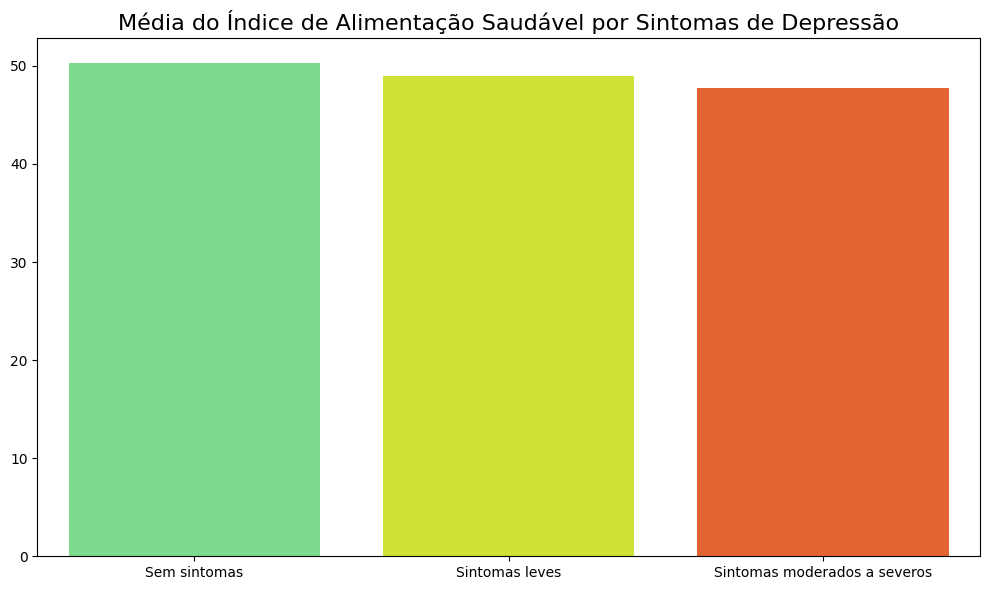

In [70]:
# Definindo as cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Armazenando o agrupamento na variável
df_junto_hei2015total = df_junto.groupby("Phq_grp")["HEI2015_TOTAL_SCORE"].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_junto_hei2015total.index, y=df_junto_hei2015total.values,  hue=df_junto_hei2015total.index, palette=cores, legend=False)

# Adicionando título e rótulos
ax.set_title("Média do Índice de Alimentação Saudável por Sintomas de Depressão", fontsize=16)
ax.set_xlabel('')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Antes de prosseguirmos, vamos primeiro criar nossas variáveis armazenando os registros de cada um dos grupos.

In [71]:
# DataFrame com pessoas que não têm sintomas
df_sem_sintomas3 = df_junto[df_junto['Phq_grp'] == 'Sem sintomas'][['HEI2015_TOTAL_SCORE']]

# DataFrame com pessoas que têm sintomas leves
df_sintomas_leves3 = df_junto[df_junto['Phq_grp'] == 'Sintomas leves'][['HEI2015_TOTAL_SCORE']]

# DataFrame com pessoas que têm sintomas moderados a severos
df_sintomas_moderados_severos3 = df_junto[df_junto['Phq_grp'] == 'Sintomas moderados a severos'][['HEI2015_TOTAL_SCORE']]

Com os dados devidamente separados, agora vamos aplicar o **teste de Bartlett** para checar a variância dos nossos dados. Se as variâncias forem iguais, poderemos utilizar a ANOVA one-way. Caso sejam diferentes, iremos aplicar a ANOVA de Welch.

In [72]:
# Importando o teste de barlett
from scipy.stats import bartlett

# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_sem_sintomas3['HEI2015_TOTAL_SCORE'] ,df_sintomas_leves3['HEI2015_TOTAL_SCORE'], df_sintomas_moderados_severos3['HEI2015_TOTAL_SCORE'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Bartlett: 4.2700065681136605
Valor p: 0.11824420205531835

Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.


A um nível de significância de 0,05, falhamos em rejeitar a hipótese nula, logo podemos concluir que não temos evidências suficientes para rejeitar a nula. Portanto, as variâncias são iguais.

Como as variâncias são iguais, podemos aplicar a ANOVA one-way.

In [73]:
# Importando o ANOVA
from scipy.stats import f_oneway

# Aplicando a ANOVA
resultado_anova = f_oneway(df_sem_sintomas3, df_sintomas_leves3, df_sintomas_moderados_severos3)

print("Estatística F:", f_statistic)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Rejeitar H0: Há diferença significativa entre as médias.")
else:
    print("Falha em rejeitar H0: Não há diferença significativa entre as médias.")

Estatística F: 22.075890351118545
Valor p: 2.8316968173410054e-10
Rejeitar H0: Há diferença significativa entre as médias.


Obtivemos um p-valor muito baixo, então, a um nível de significância de 0,05, rejeitamos a H0 e temos evidências suficientes para acreditar que as médias são estatisticamente diferentes.

É importante frisarmos que, nesse caso, não será possível aplicarmos o teste de Tukey, pois temos valores ausentes em nossa variável de análise que é a 'HEI2015_TOTAL_SCORE'. Como nosso objetivo atual não é realizar esse tratamento, vamos partir para a conclusão direta, aceitando as diferenças e levando em consideração o novo valor de p extremamente baixo.

**Conclusões**:

- O teste de hipótese revelou diferenças estatisticamente significativas entre as médias do Índice de Alimentação Saudável (HEI2015_TOTAL_SCORE) nos diferentes grupos de sintomas de depressão. Isso sugere que os hábitos alimentares podem estar relacionados aos níveis de sintomas de depressão, corroborando com as observações iniciais de que os pacientes com sintomas mais graves tendem a ter escores mais baixos de alimentação saudável.

### **Testes de hipóteses (idade)**

Vamos observar como os sintomas de depressão se comportam de acordo com a idade das pessoas.

In [74]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["RIDAGEYR"].mean().sort_values(ascending=False)

Phq_grp
Sem sintomas                    45.379462
Sintomas moderados a severos    44.527869
Sintomas leves                  43.583217
Name: RIDAGEYR, dtype: float64

A média de idade a partir dos sintomas parece estar bem próxima. Entre elas, podemos perceber que as pessoas sem sintomas apresentam uma média de idade maior, enquanto pessoas com sintomas moderados e severos têm uma média um pouco menor, e com sintomas leves, a menor média de todas. Aparentemente, esses resultados não estão seguindo nenhuma lógica, concorda? Dito isso, vamos seguir para aplicação de um teste de hipóteses para observarmos se essas diferenças são realmente estatisticamente significativas.

In [75]:
# DataFrame com pessoas que não têm sintomas
df_sem_sintomas4 = df_junto[df_junto['Phq_grp'] == 'Sem sintomas'][['RIDAGEYR']]

# DataFrame com pessoas que têm sintomas leves
df_sintomas_leves4 = df_junto[df_junto['Phq_grp'] == 'Sintomas leves'][['RIDAGEYR']]

# DataFrame com pessoas que têm sintomas moderados a severos
df_sintomas_moderados_severos4 = df_junto[df_junto['Phq_grp'] == 'Sintomas moderados a severos'][['RIDAGEYR']]

**Vamos observar graficamente como a média de idade varia de acordo com os níveis de sintomas.**

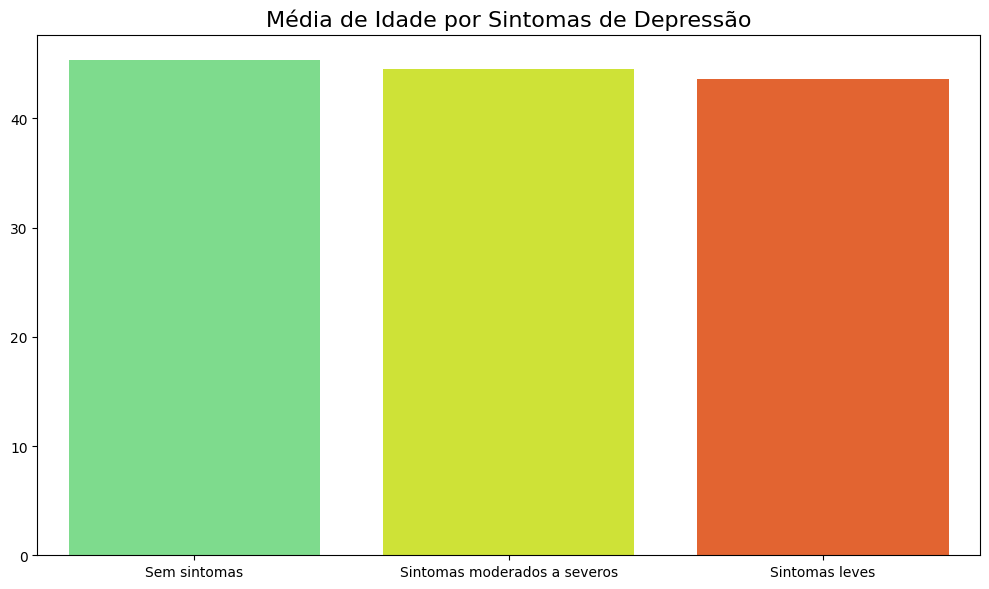

In [76]:
# Definindo as cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Armazenando o agrupamento na variável
df_junto_hei2015total = df_junto.groupby("Phq_grp")["RIDAGEYR"].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_junto_hei2015total.index, y=df_junto_hei2015total.values,  hue=df_junto_hei2015total.index, palette=cores, legend=False)

# Adicionando título e rótulos
ax.set_title("Média de Idade por Sintomas de Depressão", fontsize=16)
ax.set_xlabel('')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Agora que separamos nossos dados, vamos aplicar o teste de Bartlett para observarmos as variâncias dos dados.

In [77]:
# Importando o teste de barlett
from scipy.stats import bartlett

# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_sem_sintomas4['RIDAGEYR'] ,df_sintomas_leves4['RIDAGEYR'], df_sintomas_moderados_severos4['RIDAGEYR'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Bartlett: 11.206192182411955
Valor p: 0.003686432498327853

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.


Como temos variâncias diferentes, não podemos aplicar o ANOVA de um fator. Nesse caso, iremos aplicar o ANOVA de Welch. Como já realizamos a importação do mesmo anteriormente, não precisaremos realizar a importação novamente. Dito isso, vamos seguir direto para aplicação do mesmo.

In [78]:
# Execute o teste de ANOVA de Welch
anova_welch2 = pg.welch_anova(dv='RIDAGEYR', between='Phq_grp', data=df_junto)

# Pegue apenas o valor p do resultado
p_value = anova_welch2['p-unc'].values

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. Não existe diferença entre os grupos.")

Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. Não existe diferença entre os grupos.


A um nível de confiança de 0,05, falhamos em rejeitar a hipótese nula. Logo, podemos concluir que temos evidências suficientes de que não existem diferenças entre os grupos.

Mesmo já sabendo que não existe diferença, vamos aplicar o teste de Games-Howell apenas para observarmos os dados de comparação entre os grupos.

In [79]:
# Realizando o teste de Games-Howell
games_howell_results_pagminw2 = pg.pairwise_gameshowell(df_junto, dv='RIDAGEYR', between='Phq_grp')

# Exibindo o resultado
games_howell_results_pagminw2

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Sem sintomas,Sintomas leves,45.379462,43.583217,1.796245,0.805000,2.231361,979.031897,0.066498,0.088548
1,Sem sintomas,Sintomas moderados a severos,45.379462,44.527869,0.851593,1.055059,0.807152,363.864136,0.698834,0.042189
2,Sintomas leves,Sintomas moderados a severos,43.583217,44.527869,-0.944652,1.252666,-0.754113,642.889814,0.731246,-0.049109


Levando em consideração que nosso valor de alpha é 0,05, podemos tirar algumas conclusões interessantes:

**Observando o grupo Sem sintomas x Sintomas leves**:

- A media de idade das pessoas sem sintomas é de 45,37 anos enquanto a média de idade das pessoas com sintomas leves é de 43,58 anos, realmente as médias estão bem proximas exibindo uma diferença de 1,79 anos

- Temos um erro padrão 0,80

- Enquanto a estatistica do nosso teste é de 2,23

- Temos um grau de liberdade de 979

- Nosso p-valor foi de 0,06 um pouco acima do nosso nivel de significancia dessa forma realmente falhamos em rejeitar a hipotese nula, dito isso não existem diferenças significativas entre a media desses dois grupos

**Observando o grupo Sem sintomas x Sintomas moderados a severos**:

- Como vimos anteriormente a media do grupo que não apresentou sintomas é de 45,37 quando comparamos com a media do grupo dos sintomas moderados a severos que é de 44,52 encontramos uma diferença entre as medias de 0,85 anos

- Temos um erro padrão de 1

- A estatistica do nosso teste é de 0,80

- Temos 363 graus de liberdade

- Temos também um p-valor de 0,69 que é bem maior que o nosso nivel de significancia então nesse caso também falhamos em rejeitar a nula e não temos eviedncias suficienrtes para acreditar que as médias são estatisticamente diferentes

**Observando o grupo Sem leves x Sintomas moderados a severos**:

- Aqui encontramos uma diferença de -0,94 entre as médias

- Um erro padrão de 1,25

- Temos uma estatistica de -0,75

- Nosso grau de liberdade é de 642

- Encontramos um p-valor maior que o anterior podendo ser considerado muito maior que o nosso alpha, o p-valor dessa comparação foi de 0,73 dito isso falhamos mais uma vez e rejetira a hipotese nula




**Conclusões**:

Os resultados das comparações entre os três grupos corroboram com os achados do teste ANOVA de Welch realizado anteriormente. Embora tenhamos observado pequenas diferenças nas médias de idade entre os grupos, essas diferenças não são estatisticamente significativas a um nível de significância de 0,05. Portanto, com base em nossos dados, podemos concluir que o atributo idade não demonstra uma influência substancial sobre os sintomas da depressão.

### **Testes de hipóteses (renda)**

Lmebrando que 'INDFMINC' representa a renda anual familiar.

In [80]:
# Agrupando os dados e observando a média
df_junto.groupby("Phq_grp")["INDFMINC"].mean().sort_values(ascending=False)

Phq_grp
Sintomas leves                  9.410765
Sem sintomas                    8.782893
Sintomas moderados a severos    6.539735
Name: INDFMINC, dtype: float64

Vamos interpretar esse resultado com base no nosso dicionário de dados que fizemos logo no começo das nossas análises. Dito isso, podemos perceber os seguintes detalhes:

- Pessoas que apresentam os sintomas leves têm uma renda média anual de 55 a 65 mil dólares, enquanto pessoas sem nenhum sintoma possuem renda de 45 a 55 mil dólares, e pessoas com sintomas moderados a severos recebem em média anualmente 25 a 35 mil dólares.

Temos diferenças entre os grupos, mas será que essa diferença é estatisticamente significativa? Para descobrir, vamos aplicar um teste de hipótese.

In [81]:
# DataFrame com pessoas que não têm sintomas
df_sem_sintomas4 = df_junto[df_junto['Phq_grp'] == 'Sem sintomas'][['INDFMINC']]

# DataFrame com pessoas que têm sintomas leves
df_sintomas_leves4 = df_junto[df_junto['Phq_grp'] == 'Sintomas leves'][['INDFMINC']]

# DataFrame com pessoas que têm sintomas moderados a severos
df_sintomas_moderados_severos4 = df_junto[df_junto['Phq_grp'] == 'Sintomas moderados a severos'][['INDFMINC']]

Agora vamos observar graficamente como a renda varia de acordo com os niveis de sintomas de sintomas

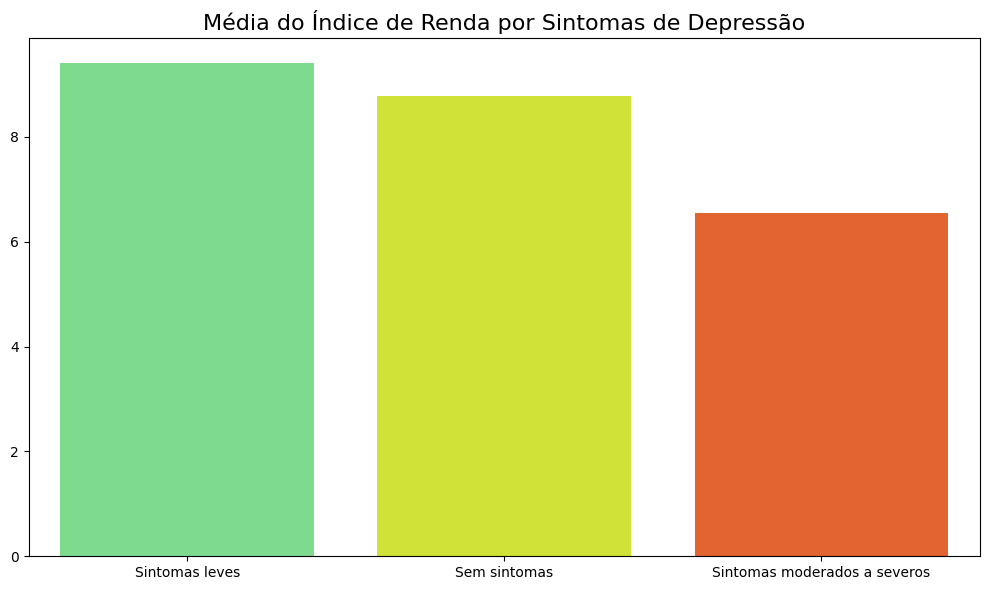

In [82]:
# Definindo as cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Armazenando o agrupamento na variável
df_junto_hei2015total = df_junto.groupby("Phq_grp")["INDFMINC"].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_junto_hei2015total.index, y=df_junto_hei2015total.values,  hue=df_junto_hei2015total.index, palette=cores, legend=False)

# Adicionando título e rótulos
ax.set_title("Média do Índice de Renda por Sintomas de Depressão", fontsize=16)
ax.set_xlabel('')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Agora que já dividimos os dados em seus respectivos sintomas, vamos realizar o teste de Bartlett.

In [83]:
# Importando o teste de barlett
from scipy.stats import bartlett

# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_sem_sintomas4['INDFMINC'] ,df_sintomas_leves4['INDFMINC'], df_sintomas_moderados_severos4['INDFMINC'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Bartlett: 123.17435456631816
Valor p: 1.7907243945491788e-27

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.


Obtivemos um p-valor muito baixo, então a um nível de significância de 0,05, rejeitamos a hipótese nula com muita folga. E já que rejeitamos a hipótese nula, isso significa que temos evidências suficientes de que as variâncias são diferentes. Sendo assim, precisaremos recorrer ao ANOVA de Welch novamente.

In [84]:
# Execute o teste de ANOVA de Welch
anova_welch3 = pg.welch_anova(dv='INDFMINC', between='Phq_grp', data=df_junto)

# Pegue apenas o valor p do resultado
p_value = anova_welch3['p-unc'].values

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. Não existe diferença entre os grupos.")

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.


Após aplicarmos a ANOVA de Welch, podemos perceber que, a um nível de significância de 0,05, rejeitamos a hipótese nula. Logo, podemos afirmar que ao menos um grupo difere dos demais. Dito isso, vamos investigar mais a fundo quais grupos diferem dos demais. Para descobrirmos isso, vamos utilizar o teste de Games-Howell.

In [85]:
# Realizando o teste de Games-Howell
games_howell_results_pagminw3 = pg.pairwise_gameshowell(df_junto, dv='INDFMINC', between='Phq_grp')

# Exibindo o resultado
games_howell_results_pagminw3

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Sem sintomas,Sintomas leves,8.782893,9.410765,-0.627872,0.629799,-0.996940,849.400426,0.578990,-0.048615
1,Sem sintomas,Sintomas moderados a severos,8.782893,6.539735,2.243158,0.607833,3.690419,368.262082,0.000752,0.183834
2,Sintomas leves,Sintomas moderados a severos,9.410765,6.539735,2.871030,0.833643,3.443957,869.753425,0.001738,0.198533


**Pontos Importantes**:

Levando em consideração que nosso valor de alpha é 0,05, podemos tirar algumas conclusões interessantes:

**Sem sintomas x Sintomas leves**:

- A diferença entre as médias é de -0,62. Obtivemos um p-valor de 0,578990, que é bem maior que o nosso nível de significância de 0,05. Logo, falhamos em rejeitar a hipótese nula. Portanto, não existem evidências suficientes para concluirmos que a diferença entre essas médias é estatisticamente significativa.

**Sem sintomas x Sintomas moderados a severos**:

- A diferença entre as médias é de 2,24, com um p-valor de 0,000752, que é bem menor que o nosso nível de significância de 0,05. Assim, rejeitamos a hipótese nula e podemos concluir que, a um nível de significância de 0,05, a diferença entre a média da renda anual de uma pessoa sem sintomas e de uma pessoa com sintomas moderados a severos é estatisticamente significativa.

**Sintomas leves x Sintomas moderados a severos**:

- A diferença entre as médias é de 2,87, com um p-valor de 0,001738, que é menor que o nosso nível de significância de 0,05. Portanto, rejeitamos a hipótese nula. Assim, temos evidências suficientes para concluir que as médias de renda entre esses dois grupos são estatisticamente diferentes.

**Conclusões**:

Os resultados indicam que a média da renda não é uma característica de grande significância para diferenciar pessoas sem sintomas de pessoas com sintomas leves. No entanto, quando comparamos pessoas sem sintomas com aquelas que apresentam sintomas moderados ou severos, fica evidente que existe uma diferença significativa na média de renda. O mesmo é observado quando comparamos sintomas leves com sintomas moderados a severos. Portanto, a média de renda parece ser um fator mais relevante para distinguir pessoas com sintomas moderados ou severos dos outros grupos.








### **Matriz de correlação**

Vamos verificar a correlação das nossas variáveis numéricas.

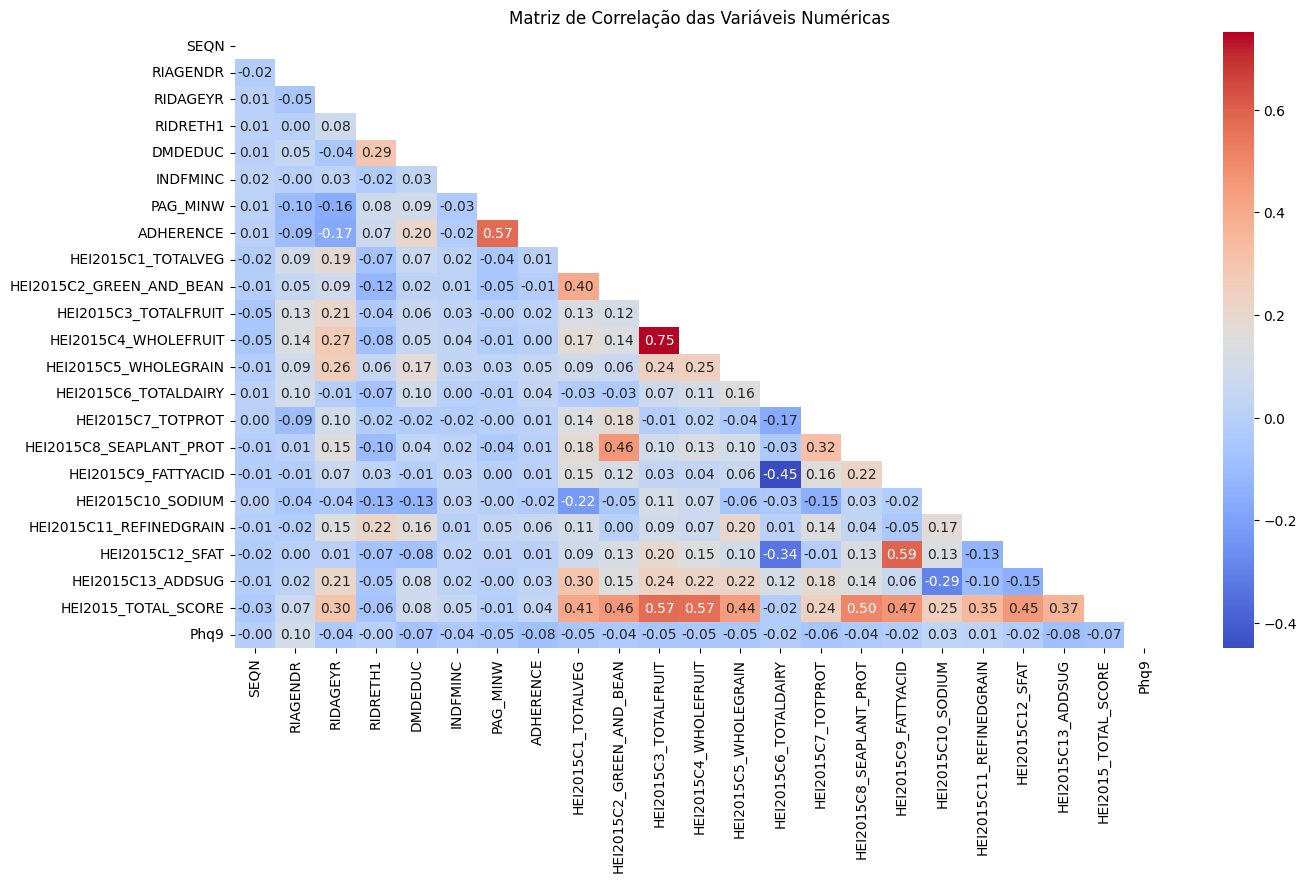

In [86]:
# Gerando a matriz de correlação das variáveis numéricas do DataFrame
df_numeric = df_junto.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
correlation_matrix = df_numeric.corr()

# Gerando uma máscara para esconder a metade superior da matriz de correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotando o gráfico de correlação usando seaborn com a máscara (apenas um lado do triângulo)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Adicionando o título
plt.title('Matriz de Correlação das Variáveis Numéricas')

# Exibindo o gráfico
plt.show()

Levando em consideração que nossa variável de interesse é uma variável categórica, nossa matriz de correlação não diz muito sobre a relação da nossa variável de interesse e nossas outras variáveis. O máximo de informações que conseguiremos retirar daqui é a correlação entre as nossas variáveis entre si. O que, em nosso caso atual, não é de grande valia no momento, embora possa ser de grande valia futuramente. Dito isso, vamos deixar a nossa matriz aqui por enquanto.

## **Respondendo às Perguntas**



1. **Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos?**

   Com base nas conclusões fornecidas, podemos delinear o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos da seguinte maneira:

   - **Engajamento em Atividades Físicas:**
     - **Sem sintomas vs. Sintomas leves:** Pessoas com sintomas leves de depressão tendem a se engajar em atividades físicas em níveis semelhantes às pessoas sem sintomas.
     - **Sem sintomas vs. Sintomas moderados a severos:** Pessoas com sintomas moderados a severos de depressão gastam significativamente menos tempo em atividades físicas em comparação com aquelas sem sintomas.
     - **Sintomas leves vs. Sintomas moderados a severos:** Pessoas com sintomas leves gastam mais tempo em atividades físicas do que aquelas com sintomas moderados a severos, indicando que o engajamento em atividades físicas diminui à medida que os sintomas de depressão se tornam mais graves.

   - **Hábitos Alimentares:**
     - Os hábitos alimentares, medidos pelo Índice de Alimentação Saudável (HEI2015_TOTAL_SCORE), tendem a ser menos saudáveis entre pacientes com sintomas mais graves de depressão. Isso sugere uma correlação entre sintomas de depressão e qualidade da alimentação, com indivíduos mais depressivos apresentando escores mais baixos de alimentação saudável.

   - **Idade:**
     - As médias de idade entre os diferentes grupos de sintomas de depressão não apresentam diferenças estatisticamente significativas. Portanto, a idade não parece ser um fator substancialmente influente nos sintomas da depressão.

   - **Renda:**
     - A média da renda não é uma característica significativa para diferenciar pessoas sem sintomas de pessoas com sintomas leves. No entanto, existe uma diferença significativa na média de renda ao comparar pessoas sem sintomas com aquelas que apresentam sintomas moderados a severos. Pessoas com sintomas moderados a severos tendem a ter rendas significativamente diferentes (provavelmente menores) do que aquelas sem sintomas ou com sintomas leves.

   **Resumo do Perfil:**
   - **Atividades Físicas:** Indivíduos com sintomas moderados a severos de depressão tendem a gastar menos tempo em atividades físicas. O engajamento em atividades físicas diminui à medida que a gravidade dos sintomas de depressão aumenta.
   - **Hábitos Alimentares:** Indivíduos com sintomas mais graves de depressão tendem a ter hábitos alimentares menos saudáveis.
   - **Idade:** Não há uma influência substancial da idade sobre os sintomas de depressão.
   - **Renda:** Indivíduos com sintomas moderados a severos de depressão tendem a ter uma renda menor comparado com aqueles sem sintomas ou com sintomas leves.

   Essas observações sugerem que a gravidade dos sintomas de depressão está associada a menor engajamento em atividades físicas, piores hábitos alimentares e, possivelmente, menor renda. Estratégias de intervenção podem ser mais eficazes se focarem em melhorar a atividade física e os hábitos alimentares, especialmente em indivíduos com sintomas moderados a severos de depressão.

--------------------------------

2. **Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?**

   Sim, hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.

   **Atividade Física:**
   - Indivíduos sem sintomas ou com sintomas leves de depressão tendem a se engajar mais em atividades físicas. A análise mostrou que pessoas sem sintomas apresentam uma média de tempo gasto em atividades físicas significativamente maior do que aquelas com sintomas moderados a severos. Além disso, pessoas com sintomas leves também gastam mais tempo em atividades físicas em comparação com aquelas com sintomas moderados a severos.

   **Hábitos Alimentares:**
   - A análise do Índice de Alimentação Saudável (HEI2015_TOTAL_SCORE) revelou diferenças estatisticamente significativas entre os diferentes grupos de sintomas de depressão. Pacientes com sintomas mais graves tendem a ter escores mais baixos de alimentação saudável, sugerindo que hábitos alimentares menos saudáveis estão associados a níveis mais altos de sintomas de depressão.

   Esses resultados indicam que tanto uma maior participação em atividades físicas quanto hábitos alimentares mais saudáveis estão associados a menores índices de depressão. Indivíduos com sintomas moderados a severos de depressão apresentam menos engajamento em atividades físicas e escores mais baixos em alimentação saudável, enquanto aqueles com sintomas leves ou sem sintomas tendem a se engajar mais em atividades físicas e a ter hábitos alimentares mais saudáveis.


### **Gênero**

Nessa etapa vamos observar como os sintomas se dividem de acordo com o genero das pessoas lembrando que pessoas com a variavel 'RIAGENDR' = 1 são pesoas do genero Masculino e pessoas com o 'RIAGENDR' = 2 são do genero Feminino

In [94]:
# Armazenando apenas os registros de gênero masculino
df_homens = df_junto[df_junto['RIAGENDR'] == 1][['Phq_grp']]

# Observando quantos registros temos em cada uma das categorias
df_homens.value_counts()

Phq_grp                     
Sem sintomas                    2156
Sintomas leves                   283
Sintomas moderados a severos     122
Name: count, dtype: int64

Pontos importantes:

- A maioria dos indivíduos do gênero masculino não apresenta sintomas significativos de saúde mental. Especificamente, 2156 de 2561 indivíduos (aproximadamente 84,2%) estão na categoria "Sem sintomas".

- 283 indivíduos (aproximadamente 11,1%) apresentam "Sintomas leves".

- 122 indivíduos (aproximadamente 4,8%) apresentam "Sintomas moderados a severos".

**Conclusões**

- Mesmo que a maioria esteja sem sintomas, uma parte significativa da população apresenta sintomas leves ou moderados a severos, o que indica a necessidade de intervenções preventivas e de tratamento.

- Aproximadamente 15,8% dos indivíduos apresentam algum nível de sintomas de saúde mental, sugerindo que programas de apoio e serviços de saúde mental devem estar disponíveis e acessíveis.

Vamos observar graficamente como esses sintomas estão distribuidos de acordo com o genero masculino

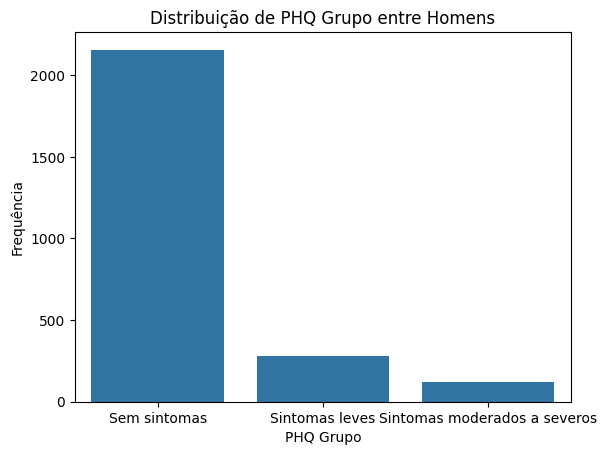

In [109]:
# Contando o número de registros em cada categoria
contagem_categorias_h = df_homens['Phq_grp'].value_counts()

# Criando o gráfico de barras
sns.barplot(contagem_categorias_h)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de PHQ Grupo entre Homens')
plt.xlabel('PHQ Grupo')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

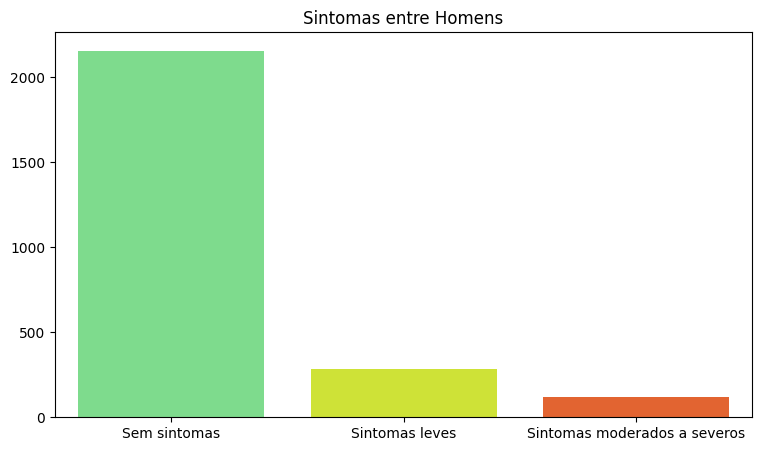

In [121]:
# Contando o número de registros em cada categoria
contagem_categorias_m = df_homens['Phq_grp'].value_counts().reset_index()
contagem_categorias_m.columns = ['Phq_grp', 'Frequência']

# Lista de cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Criando o gráfico
plt.figure(figsize=(9, 5))

# Criando o gráfico de barras com as cores especificadas
sns.barplot(x='Phq_grp', y='Frequência', data=contagem_categorias_m,  hue='Phq_grp',dodge=False, palette=cores, legend=False)

# Adicionando título e rótulos aos eixos
plt.title('Sintomas entre o gênero masculino')
plt.xlabel('')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Agora vamos observar como esta distribuido os sintomas no genero feminino

In [99]:
# Armazenando apenas os registros de gênero masculino
df_mulheres = df_junto[df_junto['RIAGENDR'] == 2][['Phq_grp']]

# Observando quantos registros temos em cada uma das categorias
df_mulheres.value_counts()

Phq_grp                     
Sem sintomas                    2158
Sintomas leves                   432
Sintomas moderados a severos     183
Name: count, dtype: int64

Pontos importantes:

- A maioria dos indivíduos do gênero feminino não apresenta sintomas significativos de saúde mental. Especificamente, 2158 de 2773 indivíduos (aproximadamente 77,8%) estão na categoria "Sem sintomas".

- 432 indivíduos (aproximadamente 15,6%) apresentam "Sintomas leves".

- 183 indivíduos (aproximadamente 6,6%) apresentam "Sintomas moderados a severos.

**Conclusões:**

- Assim como no gênero masculino, a maioria dos indivíduos do gênero feminino parece ter uma saúde mental boa ou estável, estando na categoria "Sem sintomas". No entanto, a proporção é um pouco menor comparada aos homens.

- Há uma proporção maior de mulheres apresentando sintomas leves e moderados a severos em comparação aos homens. Aproximadamente 22,2% das mulheres apresentam algum nível de sintomas de saúde mental, em contraste com 15,8% dos homens.


**Agora vamos observar o gráfico dos sintomas das mulheres**

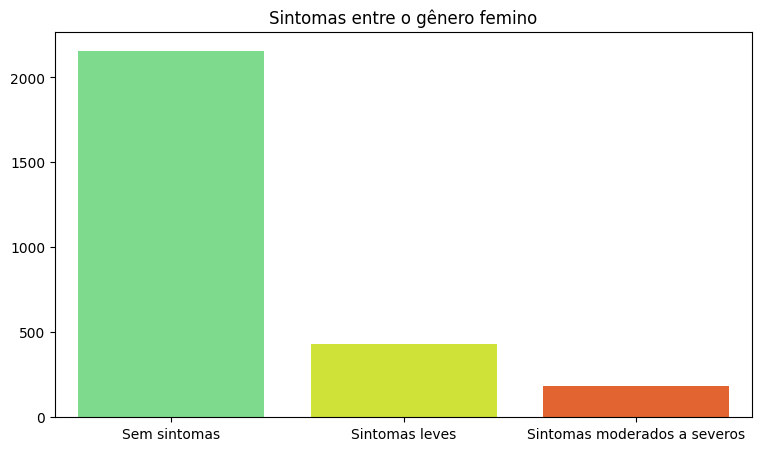

In [123]:
# Contando o número de registros em cada categoria
contagem_categorias_f = df_mulheres['Phq_grp'].value_counts().reset_index()
contagem_categorias_f.columns = ['Phq_grp', 'Frequência']

# Lista de cores
cores = ["#6EEB83", "#E4FF1A", "#FF5714"]

# Criando o gráfico
plt.figure(figsize=(9, 5))

# Criando o gráfico de barras com as cores especificadas
sns.barplot(x='Phq_grp', y='Frequência', data=contagem_categorias_f,  hue='Phq_grp',dodge=False, palette=cores, legend=False)

# Adicionando título e rótulos aos eixos
plt.title('Sintomas entre o gênero femino')
plt.xlabel('')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

**Conclusões gerais**

- Com uma proporção notável de indivíduos apresentando sintomas leves, intervenções precoces poderiam evitar a progressão para sintomas mais graves.

- Programas de conscientização e de apoio psicológico podem ser benéficos para essa população, ajudando a identificar e tratar sintomas de maneira eficiente.

- A maior proporção de sintomas leves e moderados a severos entre as mulheres indica uma necessidade aumentada de intervenções preventivas e de tratamento.

- Programas de apoio psicológico e de saúde mental devem ser amplamente acessíveis e adaptados para atender essa maior necessidade entre as mulheres.

- Embora haja uma base sólida de saúde mental em ambas as populações, é vital reconhecer e endereçar as diferentes necessidades e desafios enfrentados por homens e mulheres em relação à saúde mental.
